In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

uwrfkaggler_ravdess_emotional_speech_audio_path = kagglehub.dataset_download('uwrfkaggler/ravdess-emotional-speech-audio')
adrivg_ravdess_emotional_speech_video_path = kagglehub.dataset_download('adrivg/ravdess-emotional-speech-video')
madhavdeshatwad_mapping_train_test_valid_revdess_path = kagglehub.dataset_download('madhavdeshatwad/mapping-train-test-valid-revdess')
madhavdeshatwad_test_data_path = kagglehub.dataset_download('madhavdeshatwad/test-data')

print('Data source import complete.')


# Explore the Data

In [ ]:
files = []
import os
for dirname, _, filenames in os.walk("/kaggle/input/ravdess-emotional-speech-video"):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
len(files)

2880

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a bright theme for all plots
sns.set(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
df = pd.DataFrame()
df["paths"] = files

In [ ]:
df.head()

,paths
0,/kaggle/input/ravdess-emotional-speech-video/R...
1,/kaggle/input/ravdess-emotional-speech-video/R...
2,/kaggle/input/ravdess-emotional-speech-video/R...
3,/kaggle/input/ravdess-emotional-speech-video/R...
4,/kaggle/input/ravdess-emotional-speech-video/R...


![image.png](attachment:10c9ea6e-187c-487d-9a0e-0952919ae93f.png)

In [ ]:
def get(ss,ind):
    for s in ss:
        return s.split("/")[-1].split("-")[ind]

In [ ]:
df["paths"][0].split("/")[-1].split(".")[0][3:]

'01-08-02-02-01-15'

In [ ]:
df["Modality"] = df["paths"].apply(lambda x: x.split("/")[-1].split("-")[0])
df["channel"] = df["paths"].apply(lambda x: x.split("/")[-1].split("-")[1])
df["emotion"] = df["paths"].apply(lambda x: x.split("/")[-1].split("-")[2])
df["intensity"] = df["paths"].apply(lambda x: x.split("/")[-1].split("-")[3])
df["statement"] = df["paths"].apply(lambda x: x.split("/")[-1].split("-")[4])
df["repetition"] = df["paths"].apply(lambda x: x.split("/")[-1].split("-")[5])
df["actor"] = df["paths"].apply(lambda x: int(x.split("/")[-1].split("-")[6].split(".")[0]))
df["key"] = df["paths"].apply(lambda x: x.split("/")[-1].split(".")[0][3:])


In [ ]:
# Mappings
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

intensity_map = {
    '01': 'normal',
    '02': 'strong'
}

def extract_metadata(filename):
    parts = filename.split("/")[-1].split("-")
    emotion_code = parts[2]
    intensity_code = parts[3]
    actor_id = parts[-1].split('.')[0]

    emotion = emotion_map[emotion_code]
    intensity = intensity_map[intensity_code] if emotion_code != '01' else 'normal'
    gender = 'Male' if int(actor_id) % 2 != 0 else 'Female'

    return pd.Series([emotion, intensity, gender])

# Apply extraction
df[['emotion_label', 'intensity_label', 'gender_label']] = df['paths'].apply(extract_metadata)

# Show the resulting DataFrame
display(df.head)


<bound method NDFrame.head of                                                   paths Modality channel  \
0     /kaggle/input/ravdess-emotional-speech-video/R...       02      01   
1     /kaggle/input/ravdess-emotional-speech-video/R...       02      01   
2     /kaggle/input/ravdess-emotional-speech-video/R...       02      01   
3     /kaggle/input/ravdess-emotional-speech-video/R...       02      01   
4     /kaggle/input/ravdess-emotional-speech-video/R...       02      01   
...                                                 ...      ...     ...   
2875  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   
2876  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   
2877  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   
2878  /kaggle/input/ravdess-emotional-speech-video/R...       02      01   
2879  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   

     emotion intensity statement repetition  actor       

In [ ]:
df["Modality"].value_counts(), df["channel"].value_counts()

(Modality
 02    1440
 01    1440
 Name: count, dtype: int64,
 channel
 01    2880
 Name: count, dtype: int64)

## Map video with their audios

In [ ]:
audio_path = "/kaggle/input/ravdess-emotional-speech-audio"
audio_path_files = []
import os
for dirname, _, filenames in os.walk(audio_path):
    for filename in filenames:
        audio_path_files.append(os.path.join(dirname, filename))
print(len(audio_path_files))

2880


In [ ]:
df = df.sort_values("paths")
df["paths"]

530     /kaggle/input/ravdess-emotional-speech-video/R...
480     /kaggle/input/ravdess-emotional-speech-video/R...
486     /kaggle/input/ravdess-emotional-speech-video/R...
489     /kaggle/input/ravdess-emotional-speech-video/R...
495     /kaggle/input/ravdess-emotional-speech-video/R...
                              ...                        
1775    /kaggle/input/ravdess-emotional-speech-video/R...
1704    /kaggle/input/ravdess-emotional-speech-video/R...
1783    /kaggle/input/ravdess-emotional-speech-video/R...
1741    /kaggle/input/ravdess-emotional-speech-video/R...
1754    /kaggle/input/ravdess-emotional-speech-video/R...
Name: paths, Length: 2880, dtype: object

In [ ]:
audio_df = pd.DataFrame()
audio_df["audio_paths"] = audio_path_files
audio_df["key"] = audio_df["audio_paths"].apply(lambda x: x.split("/")[-1].split(".")[0][3:])
audio_df

,audio_paths,key
0,/kaggle/input/ravdess-emotional-speech-audio/A...,01-08-01-01-01-02
1,/kaggle/input/ravdess-emotional-speech-audio/A...,01-01-01-01-01-02
2,/kaggle/input/ravdess-emotional-speech-audio/A...,01-07-02-01-02-02
3,/kaggle/input/ravdess-emotional-speech-audio/A...,01-07-01-01-02-02
4,/kaggle/input/ravdess-emotional-speech-audio/A...,01-01-01-02-01-02
...,...,...
2875,/kaggle/input/ravdess-emotional-speech-audio/A...,01-06-01-01-02-07
2876,/kaggle/input/ravdess-emotional-speech-audio/A...,01-05-01-02-02-07
2877,/kaggle/input/ravdess-emotional-speech-audio/A...,01-04-02-01-01-07
2878,/kaggle/input/ravdess-emotional-speech-audio/A...,01-07-02-02-02-07


In [ ]:
result_df = pd.merge(df, audio_df, on='key', how='inner')
result_df

,paths,Modality,channel,emotion,intensity,statement,repetition,actor,key,emotion_label,intensity_label,gender_label,audio_paths
0,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,01,01,1,01-01-01-01-01-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
1,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,01,01,1,01-01-01-01-01-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/a...
2,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,01,02,1,01-01-01-01-02-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
3,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,01,02,1,01-01-01-01-02-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/a...
4,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,02,01,1,01-01-01-02-01-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,/kaggle/input/ravdess-emotional-speech-video/R...,02,01,08,02,01,02,24,01-08-02-01-02-24,surprised,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/a...
5756,/kaggle/input/ravdess-emotional-speech-video/R...,02,01,08,02,02,01,24,01-08-02-02-01-24,surprised,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...
5757,/kaggle/input/ravdess-emotional-speech-video/R...,02,01,08,02,02,01,24,01-08-02-02-01-24,surprised,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/a...
5758,/kaggle/input/ravdess-emotional-speech-video/R...,02,01,08,02,02,02,24,01-08-02-02-02-24,surprised,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...


In [ ]:
result_df = result_df.drop_duplicates(subset='key', keep='first')

result_df

,paths,Modality,channel,emotion,intensity,statement,repetition,actor,key,emotion_label,intensity_label,gender_label,audio_paths
0,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,01,01,1,01-01-01-01-01-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
2,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,01,02,1,01-01-01-01-02-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
4,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,02,01,1,01-01-01-02-01-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
6,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,01,01,02,02,1,01-01-01-02-02-01,neutral,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
8,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,02,01,01,01,1,01-02-01-01-01-01,calm,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,08,01,02,02,24,01-08-01-02-02-24,surprised,normal,Female,/kaggle/input/ravdess-emotional-speech-audio/A...
5632,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,08,02,01,01,24,01-08-02-01-01-24,surprised,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...
5634,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,08,02,01,02,24,01-08-02-01-02-24,surprised,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...
5636,/kaggle/input/ravdess-emotional-speech-video/R...,01,01,08,02,02,01,24,01-08-02-02-01-24,surprised,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...


In [ ]:
len(result_df)

1440

In [ ]:
df = result_df

In [ ]:
# === Mapping for readability ===
emotion_map = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'
}
intensity_map = {1: 'normal', 2: 'strong'}
statement_map = {'01': 'Kids by door', '02': 'Dogs by door'}
repetition_map = {1: '1st', 2: '2nd'}

df['statement_label'] = df['statement'].map(statement_map)
df['gender'] = df['actor'] % 2

/tmp/ipykernel_31/2374786321.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['statement_label'] = df['statement'].map(statement_map)
/tmp/ipykernel_31/2374786321.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['actor'] % 2


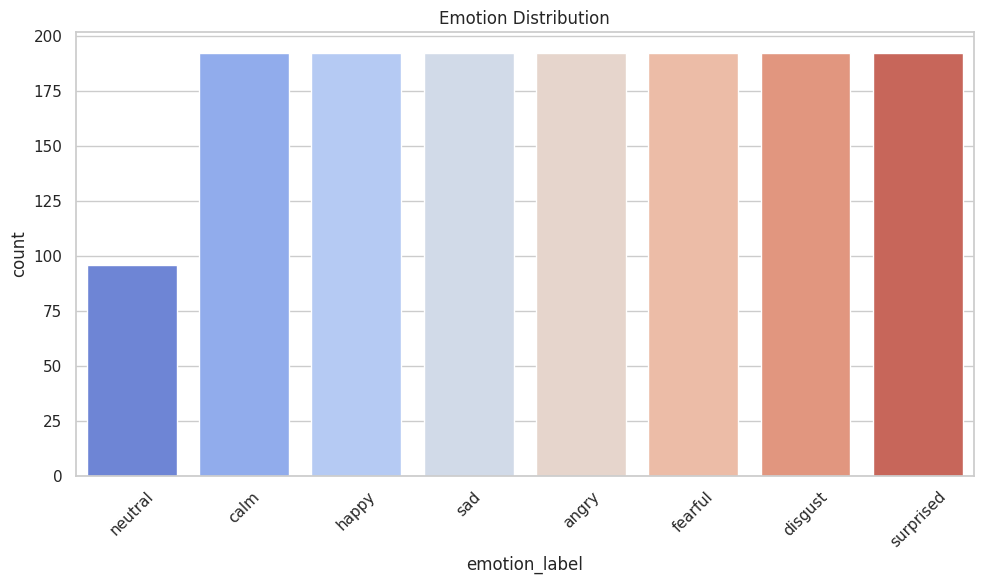

In [ ]:
# === 1. Emotion Distribution ===
plt.figure()
sns.countplot(data=df, x='emotion_label', order=emotion_map.values(), palette='coolwarm')
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

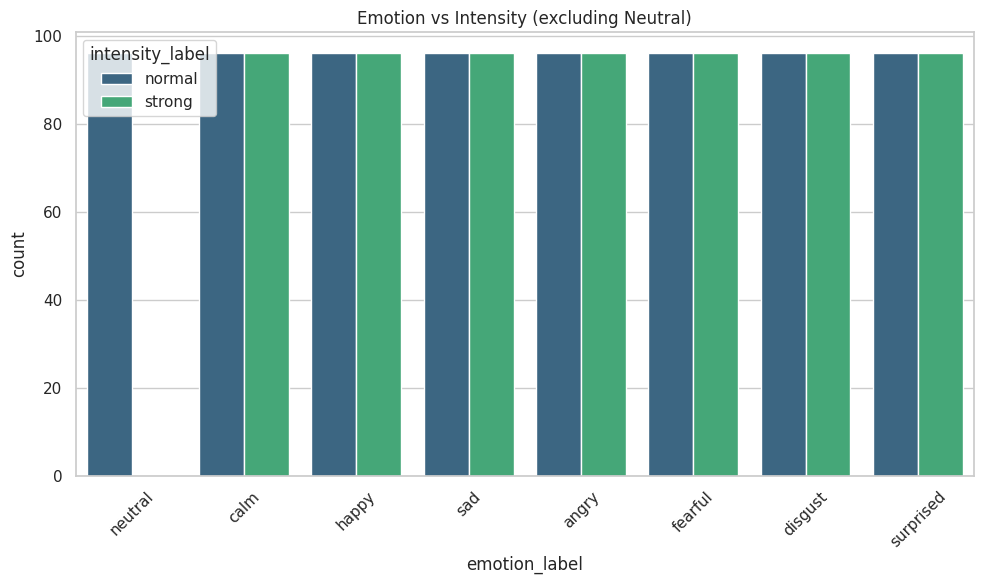

In [ ]:
# === 2. Intensity per Emotion ===
plt.figure()
sns.countplot(data=df[df['emotion'] != 1], x='emotion_label', hue='intensity_label', palette='viridis')
plt.title('Emotion vs Intensity (excluding Neutral)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

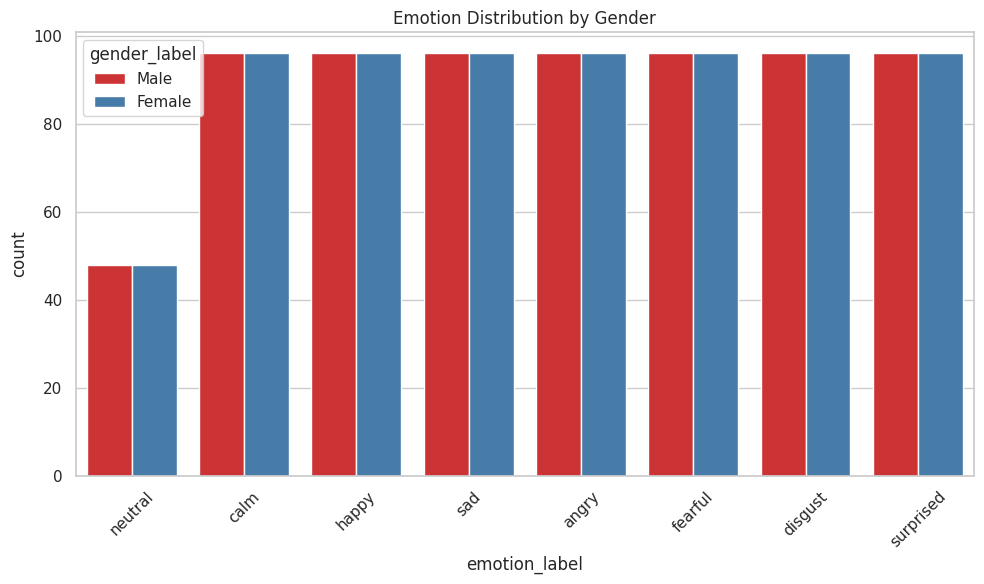

In [ ]:
# === 3. Emotion by Gender ===
plt.figure()
sns.countplot(data=df, x='emotion_label', hue='gender_label', palette='Set1')
plt.title('Emotion Distribution by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

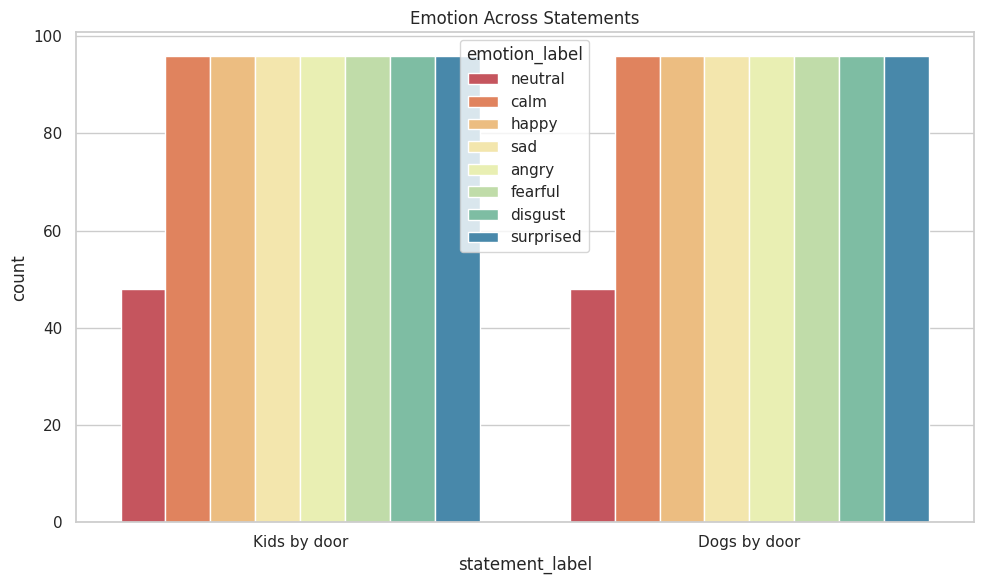

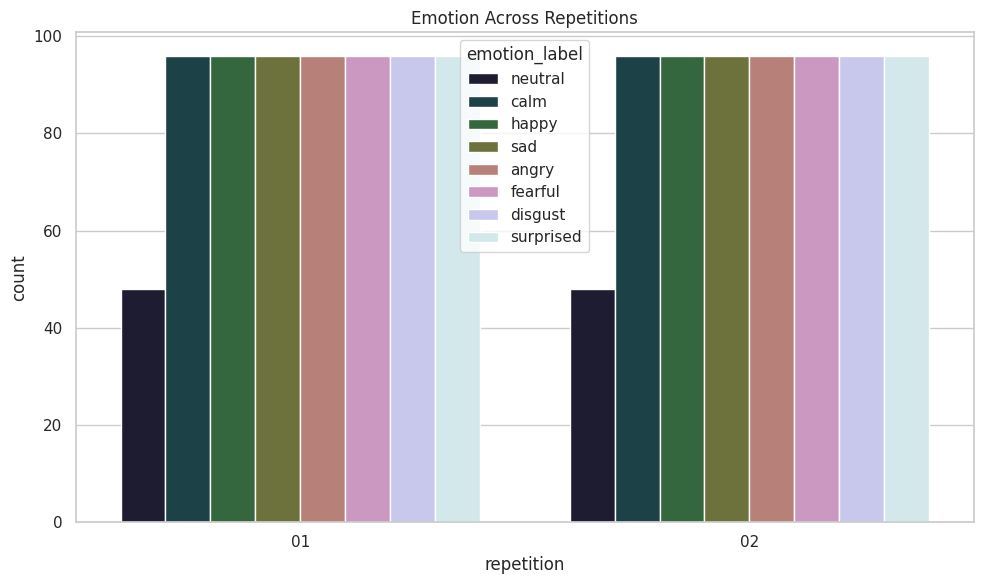

In [ ]:
# === 4. Statement and Repetition Influence ===
plt.figure()
sns.countplot(data=df, x='statement_label', hue='emotion_label', palette='Spectral')
plt.title('Emotion Across Statements')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(data=df, x='repetition', hue='emotion_label', palette='cubehelix')
plt.title('Emotion Across Repetitions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

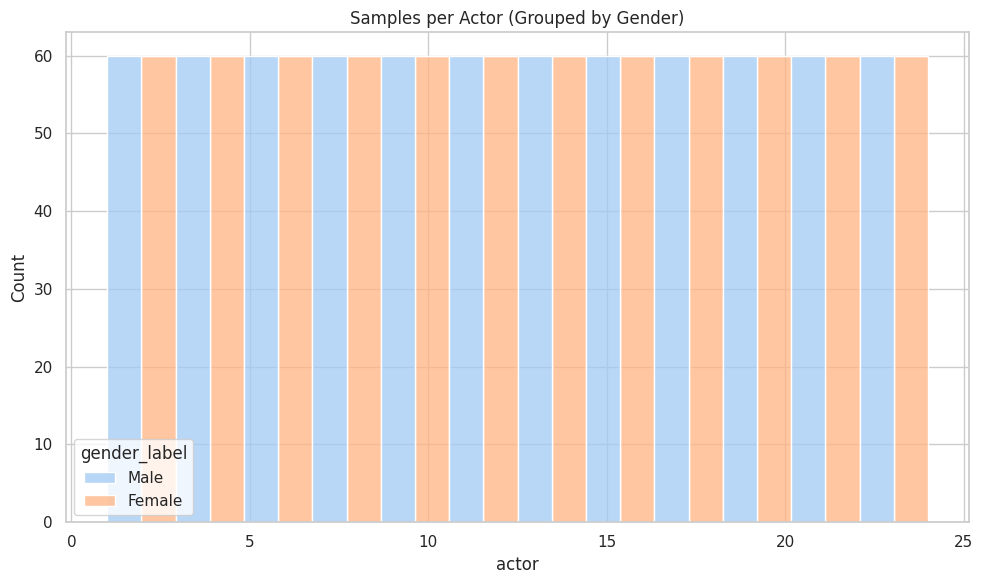

In [ ]:
# === 5. Actor Distribution ===
plt.figure()
sns.histplot(data=df, x='actor', bins=24, hue='gender_label', multiple='stack', palette='pastel')
plt.title('Samples per Actor (Grouped by Gender)')
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure()
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.tight_layout()
# plt.show()


In [ ]:
df.columns

Index(['paths', 'Modality', 'channel', 'emotion', 'intensity', 'statement',
       'repetition', 'actor', 'key', 'emotion_label', 'intensity_label',
       'gender_label', 'audio_paths', 'statement_label', 'gender'],
      dtype='object')

In [ ]:
import plotly.express as px

# Emotion distribution
fig = px.histogram(df, x='emotion_label', color='emotion_label',
                   title='Emotion Distribution', template='plotly_dark')
fig.show()

# Emotion vs Intensity (excluding neutral)
fig = px.histogram(df[df['emotion'] != 1], x='emotion_label', color='intensity_label',
                   title='Emotion vs Intensity', barmode='group', template='plotly_dark')
fig.show()

# Emotion by Gender
fig = px.histogram(df, x='emotion_label', color='gender_label',
                   title='Emotion by Gender', barmode='group', template='plotly_dark')
fig.show()

# Emotion vs Statement
fig = px.histogram(df, x='statement_label', color='emotion_label',
                   title='Emotion across Statements', barmode='group', template='plotly_dark')
fig.show()

# Emotion vs Repetition
fig = px.histogram(df, x='repetition', color='emotion_label',
                   title='Emotion across Repetitions', barmode='group', template='plotly_dark')
fig.show()


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Emotion Recognition EDA Report", explorative=True)
profile.to_file("emotion_report.html")
from IPython.display import display, HTML

# Load and display an HTML file
with open('emotion_report.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

# display(HTML(html_content))


/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00,  9.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Train, Test, Validation

In [ ]:
def create_strat_key(row):
    # Combine relevant features to form a group key
    # Exclude intensity for neutral since there's no strong version
    if row['emotion'] == 1:
        return f"{row['emotion']}_{row['statement']}_{row['repetition']}"
    else:
        return f"{row['emotion']}_{row['intensity']}_{row['statement']}_{row['repetition']}"

df['strat_key'] = df.apply(create_strat_key, axis=1)


/tmp/ipykernel_31/4178648344.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_key'] = df.apply(create_strat_key, axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

# 1. First split: Train+Val and Test (80% - 20%)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.05,
    stratify=df['strat_key'],
    random_state=42
)

# 2. Second split: Train and Validation (e.g., 80% of train_val for training)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.1,  # 0.2 * 0.9 = 0.18 → So final split = 72% train, 18% val, 10% test
    stratify=train_val_df['strat_key'],
    random_state=42
)

# ✅ Sanity check
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 1231
Validation size: 137
Test size: 72


## comparative EDA on your train, validation, and test sets

In [ ]:
def plot_distribution(df, subset_name, column, color=None):
    fig = px.histogram(df, x=column, color=color or column,
                       title=f"{column.capitalize()} Distribution in {subset_name}",
                       barmode='group', template='plotly_dark')
    fig.show()


In [ ]:
import plotly.express as px


# Emotion distribution
plot_distribution(train_df, "Train Set", "emotion_label")
plot_distribution(val_df, "Validation Set", "emotion_label")
plot_distribution(test_df, "Test Set", "emotion_label")

# Intensity (excluding neutral)
plot_distribution(train_df[train_df['emotion'] != 1], "Train Set (non-neutral)", "intensity_label", color="emotion_label")
plot_distribution(val_df[val_df['emotion'] != 1], "Validation Set (non-neutral)", "intensity_label", color="emotion_label")
plot_distribution(test_df[test_df['emotion'] != 1], "Test Set (non-neutral)", "intensity_label", color="emotion_label")

# Gender vs Emotion
plot_distribution(train_df, "Train Set", "emotion_label", color="gender_label")
plot_distribution(val_df, "Validation Set", "emotion_label", color="gender_label")
plot_distribution(test_df, "Test Set", "emotion_label", color="gender_label")


In [ ]:
!pip install sweetviz

import sweetviz as sv

# Compare train and validation
report1 = sv.compare([train_df, "Train"], [val_df, "Validation"])
report1.show_html("sweetviz_train_vs_val.html")

# Compare train and test
report2 = sv.compare([train_df, "Train"], [test_df, "Test"])
report2.show_html("sweetviz_train_vs_test.html")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 61.8 MB/s eta 0:00:00:00:010:01


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_train_vs_val.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_train_vs_test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from ydata_profiling import ProfileReport

# Profiling for each set
ProfileReport(train_df, title="Train Set Report").to_file("train_profile.html")
ProfileReport(val_df, title="Validation Set Report").to_file("val_profile.html")
ProfileReport(test_df, title="Test Set Report").to_file("test_profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 38.52it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 45.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


  6%|▋         | 1/16 [00:00<00:01,  8.07it/s]/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/typeset_relations.py:118: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`


 44%|████▍     | 7/16 [00:00<00:00, 34.86it/s]/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/typeset_relations.py:118: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/typeset_relations.py:118

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Video Modality

In [ ]:
train_df.reset_index(inplace=True)

In [ ]:
val_df.reset_index(inplace=True)

In [ ]:
test_df.reset_index(inplace=True)

In [ ]:
train_df['category'] = 'train'
test_df['category'] = 'test'
val_df['category'] = 'valid'

final_df = pd.concat([train_df, test_df, val_df], axis=0, ignore_index=True)

print(final_df.head())

   index                                              paths Modality channel  \
0   3432  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   
1   3222  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   
2   4636  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   
3   1234  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   
4   1220  /kaggle/input/ravdess-emotional-speech-video/R...       01      01   

  emotion intensity statement repetition  actor                key  \
0      06        01        01         01     15  01-06-01-01-01-15   
1      07        02        02         02     14  01-07-02-02-02-14   
2      06        01        02         01     20  01-06-01-02-01-20   
3      03        02        01         02      6  01-03-02-01-02-06   
4      02        02        02         01      6  01-02-02-02-01-06   

  emotion_label intensity_label gender_label  \
0       fearful          normal         Male   
1 

In [ ]:
final_df["category"].value_counts()

category
train    1231
valid     137
test       72
Name: count, dtype: int64

## Organise Data

In [ ]:

shutil.rmtree(folder_path1)
shutil.rmtree(folder_path)

In [ ]:
import os
from pathlib import Path
import cv2
import moviepy.editor as mp

import shutil

folder_path = '/kaggle/working/audio'
folder_path1 = '/kaggle/working/frames'

# # Delete the folder and its contents
# shutil.rmtree(folder_path)

# print(f"Folder {folder_path} has been deleted.")


def extract_frames_and_audio_from_paths(df, frame_rate=30):
    for index, row in df.iterrows():
        video_path = row['paths']  # 'paths' column contains the video paths
        emotion_label = row['emotion_label']  # 'emotion_label' contains the emotion label
        category = row['category']  # 'category' contains the train, test, validate label
        print(f"Processing video {index + 1}: {video_path}")

        video_path = Path(video_path)
        if not video_path.exists():
            print(f"Video not found: {video_path}")
            continue

        # Define directories for frames and audio based on emotion label
        frames_emotion_folder = Path('frames') / category / emotion_label
        frames_emotion_folder.mkdir(parents=True, exist_ok=True)

        audio_emotion_folder = Path('audio') / category / emotion_label
        audio_emotion_folder.mkdir(parents=True, exist_ok=True)

        # Open video capture
        cap = cv2.VideoCapture(str(video_path))
        if not cap.isOpened():
            print(f"Failed to open video: {video_path}")
            continue

        video_name = video_path.stem  # filename without extension
        count = 0
        saved = 0

        # Extract frames
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            if count % frame_rate == 0:
                frame_filename = frames_emotion_folder / f"{video_name}_frame_{saved:04d}.jpg"
                cv2.imwrite(str(frame_filename), frame)
                saved += 1

            count += 1

        cap.release()
        print(f"Extracted {saved} frames from {video_path.name}")

        # Extract audio using moviepy
        try:
            my_clip = mp.VideoFileClip(str(video_path))
            audio_path = audio_emotion_folder / f"{video_name}_audio.wav"
            my_clip.audio.write_audiofile(str(audio_path))
            print(f"Audio saved to {audio_path}")
        except Exception as e:
            print(f"Failed to extract audio from {video_path.name}: {e}")

# Call the function
extract_frames_and_audio_from_paths(final_df)

Extracted 5 frames from 01-01-08-02-01-01-19.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-01-01-19_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-01-01-19_audio.wav
Processing video 8: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_15/Actor_15/01-01-02-02-02-02-15.mp4
Extracted 4 frames from 01-01-02-02-02-02-15.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-02-02-15_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-02-02-15_audio.wav
Processing video 9: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_05/Actor_05/01-01-01-01-02-01-05.mp4
Extracted 4 frames from 01-01-01-01-02-01-05.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-02-01-05_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-02-01-05_audio.wav
Processing video 10: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_22/Actor_22/01-01-06-02-01-01-22.mp4
Extracted 4 frames from 01-01-06-02-01-01-22.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-01-01-22_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-01-01-22_audio.wav
Processing video 11: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_06/Actor_06/01-01-04-01-02-01-06.mp4
Extracted 4 frames from 01-01-04-01-02-01-06.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-02-01-06_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-02-01-06_audio.wav
Processing video 12: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_04/Actor_04/01-01-04-01-02-02-04.mp4
Extracted 4 frames from 01-01-04-01-02-02-04.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-02-02-04_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-02-02-04_audio.wav
Processing video 13: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-04-02-02-01-16.mp4
Extracted 4 frames from 01-01-04-02-02-01-16.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-02-01-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-02-01-16_audio.wav
Processing video 14: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_04/Actor_04/01-01-08-02-01-02-04.mp4
Extracted 4 frames from 01-01-08-02-01-02-04.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-01-02-04_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-01-02-04_audio.wav
Processing video 15: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_06/Actor_06/01-01-01-01-01-01-06.mp4
Extracted 4 frames from 01-01-01-01-01-01-06.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-01-01-06_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-01-01-06_audio.wav
Processing video 16: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_13/Actor_13/01-01-07-01-02-02-13.mp4


Extracted 4 frames from 01-01-07-01-02-02-13.mp4
MoviePy - Writing audio in audio/train/disgust/01-01-07-01-02-02-13_audio.wav


MoviePy - Done.
Audio saved to audio/train/disgust/01-01-07-01-02-02-13_audio.wav
Processing video 17: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_23/Actor_23/01-01-08-02-02-02-23.mp4


Extracted 4 frames from 01-01-08-02-02-02-23.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-02-02-23_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-02-02-23_audio.wav
Processing video 18: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_04/Actor_04/01-01-05-02-02-01-04.mp4
Extracted 4 frames from 01-01-05-02-02-01-04.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-02-02-01-04_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-02-02-01-04_audio.wav
Processing video 19: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_09/Actor_09/01-01-04-01-01-02-09.mp4
Extracted 4 frames from 01-01-04-01-01-02-09.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-01-02-09_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-01-02-09_audio.wav
Processing video 20: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_06/Actor_06/01-01-02-02-01-01-06.mp4
Extracted 5 frames from 01-01-02-02-01-01-06.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-01-01-06_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-01-01-06_audio.wav
Processing video 21: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_24/Actor_24/01-01-08-02-01-01-24.mp4
Extracted 4 frames from 01-01-08-02-01-01-24.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-01-01-24_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-01-01-24_audio.wav
Processing video 22: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_03/Actor_03/01-01-06-02-02-02-03.mp4
Extracted 4 frames from 01-01-06-02-02-02-03.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-02-02-03_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-02-02-03_audio.wav
Processing video 23: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-06-01-02-01-16.mp4


Extracted 4 frames from 01-01-06-01-02-01-16.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-01-02-01-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-01-02-01-16_audio.wav
Processing video 24: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_11/Actor_11/01-01-03-02-02-02-11.mp4
Extracted 4 frames from 01-01-03-02-02-02-11.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-02-02-11_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-02-02-11_audio.wav
Processing video 25: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_01/Actor_01/01-01-04-02-02-01-01.mp4
Extracted 4 frames from 01-01-04-02-02-01-01.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-02-01-01_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-02-01-01_audio.wav
Processing video 26: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_24/Actor_24/01-01-05-02-01-02-24.mp4
Extracted 5 frames from 01-01-05-02-01-02-24.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-02-01-02-24_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-02-01-02-24_audio.wav
Processing video 27: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-03-02-02-02-16.mp4
Extracted 4 frames from 01-01-03-02-02-02-16.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-02-02-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-02-02-16_audio.wav
Processing video 28: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_10/Actor_10/01-01-05-01-02-01-10.mp4


Extracted 5 frames from 01-01-05-01-02-01-10.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-02-01-10_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-02-01-10_audio.wav
Processing video 29: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_20/Actor_20/01-01-02-01-02-01-20.mp4
Extracted 4 frames from 01-01-02-01-02-01-20.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-01-02-01-20_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-01-02-01-20_audio.wav
Processing video 30: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_21/Actor_21/01-01-03-01-01-02-21.mp4


Extracted 4 frames from 01-01-03-01-01-02-21.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-01-02-21_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-01-02-21_audio.wav
Processing video 31: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_02/Actor_02/01-01-03-01-01-01-02.mp4
Extracted 4 frames from 01-01-03-01-01-01-02.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-01-01-02_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-01-01-02_audio.wav
Processing video 32: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_18/Actor_18/01-01-08-01-01-01-18.mp4
Extracted 4 frames from 01-01-08-01-01-01-18.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-01-01-18_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-01-01-18_audio.wav
Processing video 33: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_03/Actor_03/01-01-05-02-01-02-03.mp4


Extracted 5 frames from 01-01-05-02-01-02-03.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-02-01-02-03_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-02-01-02-03_audio.wav
Processing video 34: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_20/Actor_20/01-01-06-02-01-02-20.mp4


Extracted 5 frames from 01-01-06-02-01-02-20.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-01-02-20_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-01-02-20_audio.wav
Processing video 35: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_09/Actor_09/01-01-04-02-02-01-09.mp4


Extracted 4 frames from 01-01-04-02-02-01-09.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-02-01-09_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-02-01-09_audio.wav
Processing video 36: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_09/Actor_09/01-01-05-01-01-01-09.mp4
Extracted 4 frames from 01-01-05-01-01-01-09.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-01-01-09_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-01-01-09_audio.wav
Processing video 37: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_21/Actor_21/01-01-02-02-01-01-21.mp4
Extracted 4 frames from 01-01-02-02-01-01-21.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-01-01-21_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-01-01-21_audio.wav
Processing video 38: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_12/Actor_12/01-01-08-01-01-01-12.mp4
Extracted 4 frames from 01-01-08-01-01-01-12.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-01-01-12_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-01-01-12_audio.wav
Processing video 39: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_22/Actor_22/01-01-03-02-01-02-22.mp4
Extracted 4 frames from 01-01-03-02-01-02-22.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-01-02-22_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-01-02-22_audio.wav
Processing video 40: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_17/Actor_17/01-01-05-02-01-02-17.mp4
Extracted 4 frames from 01-01-05-02-01-02-17.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-02-01-02-17_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-02-01-02-17_audio.wav
Processing video 41: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_15/Actor_15/01-01-01-01-02-01-15.mp4
Extracted 4 frames from 01-01-01-01-02-01-15.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-02-01-15_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-02-01-15_audio.wav
Processing video 42: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_13/Actor_13/01-01-01-01-01-02-13.mp4
Extracted 4 frames from 01-01-01-01-01-02-13.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-01-02-13_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-01-02-13_audio.wav
Processing video 43: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_20/Actor_20/01-01-04-01-01-01-20.mp4
Extracted 4 frames from 01-01-04-01-01-01-20.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-01-01-20_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-01-01-20_audio.wav
Processing video 44: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_15/Actor_15/01-01-07-02-02-01-15.mp4


Extracted 4 frames from 01-01-07-02-02-01-15.mp4
MoviePy - Writing audio in audio/train/disgust/01-01-07-02-02-01-15_audio.wav


MoviePy - Done.
Audio saved to audio/train/disgust/01-01-07-02-02-01-15_audio.wav
Processing video 45: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_04/Actor_04/01-01-02-02-01-02-04.mp4


Extracted 4 frames from 01-01-02-02-01-02-04.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-01-02-04_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-01-02-04_audio.wav
Processing video 46: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_19/Actor_19/01-01-06-01-01-01-19.mp4


Extracted 4 frames from 01-01-06-01-01-01-19.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-01-01-01-19_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-01-01-01-19_audio.wav
Processing video 47: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_01/Actor_01/01-01-08-01-02-01-01.mp4
Extracted 4 frames from 01-01-08-01-02-01-01.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-02-01-01_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-02-01-01_audio.wav
Processing video 48: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_03/Actor_03/01-01-03-01-01-01-03.mp4


Extracted 4 frames from 01-01-03-01-01-01-03.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-01-01-03_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-01-01-03_audio.wav
Processing video 49: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_02/Actor_02/01-01-04-01-02-02-02.mp4


Extracted 4 frames from 01-01-04-01-02-02-02.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-02-02-02_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-02-02-02_audio.wav
Processing video 50: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_22/Actor_22/01-01-08-02-01-01-22.mp4
Extracted 4 frames from 01-01-08-02-01-01-22.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-01-01-22_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-01-01-22_audio.wav
Processing video 51: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_19/Actor_19/01-01-04-02-02-01-19.mp4


Extracted 4 frames from 01-01-04-02-02-01-19.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-02-01-19_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-02-01-19_audio.wav
Processing video 52: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_23/Actor_23/01-01-08-01-02-01-23.mp4


Extracted 4 frames from 01-01-08-01-02-01-23.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-02-01-23_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-02-01-23_audio.wav
Processing video 53: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_05/Actor_05/01-01-08-01-01-02-05.mp4


Extracted 4 frames from 01-01-08-01-01-02-05.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-01-02-05_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-01-02-05_audio.wav
Processing video 54: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_17/Actor_17/01-01-06-01-01-01-17.mp4


Extracted 4 frames from 01-01-06-01-01-01-17.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-01-01-01-17_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-01-01-01-17_audio.wav
Processing video 55: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_06/Actor_06/01-01-03-02-02-01-06.mp4


Extracted 4 frames from 01-01-03-02-02-01-06.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-02-01-06_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-02-01-06_audio.wav
Processing video 56: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_15/Actor_15/01-01-08-02-02-02-15.mp4
Extracted 4 frames from 01-01-08-02-02-02-15.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-02-02-15_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-02-02-15_audio.wav
Processing video 57: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_10/Actor_10/01-01-04-02-02-02-10.mp4


Extracted 4 frames from 01-01-04-02-02-02-10.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-02-02-10_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-02-02-10_audio.wav
Processing video 58: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_11/Actor_11/01-01-05-01-02-01-11.mp4
Extracted 4 frames from 01-01-05-01-02-01-11.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-02-01-11_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-02-01-11_audio.wav
Processing video 59: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-07-01-02-01-16.mp4


Extracted 4 frames from 01-01-07-01-02-01-16.mp4
MoviePy - Writing audio in audio/train/disgust/01-01-07-01-02-01-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/disgust/01-01-07-01-02-01-16_audio.wav
Processing video 60: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_21/Actor_21/01-01-03-02-01-02-21.mp4


Extracted 4 frames from 01-01-03-02-01-02-21.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-01-02-21_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-01-02-21_audio.wav
Processing video 61: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_24/Actor_24/01-01-06-01-01-02-24.mp4
Extracted 5 frames from 01-01-06-01-01-02-24.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-01-01-02-24_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-01-01-02-24_audio.wav
Processing video 62: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_10/Actor_10/01-01-06-01-02-02-10.mp4
Extracted 4 frames from 01-01-06-01-02-02-10.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-01-02-02-10_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-01-02-02-10_audio.wav
Processing video 63: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_19/Actor_19/01-01-06-02-02-01-19.mp4
Extracted 4 frames from 01-01-06-02-02-01-19.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-02-01-19_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-02-01-19_audio.wav
Processing video 64: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_15/Actor_15/01-01-02-01-02-01-15.mp4
Extracted 4 frames from 01-01-02-01-02-01-15.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-01-02-01-15_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-01-02-01-15_audio.wav
Processing video 65: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_22/Actor_22/01-01-01-01-02-01-22.mp4
Extracted 4 frames from 01-01-01-01-02-01-22.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-02-01-22_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-02-01-22_audio.wav
Processing video 66: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_01/Actor_01/01-01-05-02-02-02-01.mp4
Extracted 5 frames from 01-01-05-02-02-02-01.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-02-02-02-01_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-02-02-02-01_audio.wav
Processing video 67: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_11/Actor_11/01-01-06-01-01-01-11.mp4
Extracted 4 frames from 01-01-06-01-01-01-11.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-01-01-01-11_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-01-01-01-11_audio.wav
Processing video 68: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_02/Actor_02/01-01-05-01-02-01-02.mp4
Extracted 4 frames from 01-01-05-01-02-01-02.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-02-01-02_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-02-01-02_audio.wav
Processing video 69: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_18/Actor_18/01-01-02-02-01-02-18.mp4


Extracted 4 frames from 01-01-02-02-01-02-18.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-01-02-18_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-01-02-18_audio.wav
Processing video 70: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_07/Actor_07/01-01-08-01-01-02-07.mp4


Extracted 4 frames from 01-01-08-01-01-02-07.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-01-02-07_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-01-02-07_audio.wav
Processing video 71: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_04/Actor_04/01-01-01-01-01-01-04.mp4


Extracted 4 frames from 01-01-01-01-01-01-04.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-01-01-04_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-01-01-04_audio.wav
Processing video 72: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_02/Actor_02/01-01-08-02-02-01-02.mp4


Extracted 4 frames from 01-01-08-02-02-01-02.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-02-01-02_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-02-01-02_audio.wav
Processing video 73: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_03/Actor_03/01-01-07-01-02-02-03.mp4


Extracted 4 frames from 01-01-07-01-02-02-03.mp4
MoviePy - Writing audio in audio/train/disgust/01-01-07-01-02-02-03_audio.wav


MoviePy - Done.
Audio saved to audio/train/disgust/01-01-07-01-02-02-03_audio.wav
Processing video 74: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_08/Actor_08/01-01-03-02-02-02-08.mp4


Extracted 4 frames from 01-01-03-02-02-02-08.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-02-02-08_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-02-02-08_audio.wav
Processing video 75: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_24/Actor_24/01-01-05-01-01-02-24.mp4
Extracted 4 frames from 01-01-05-01-01-02-24.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-01-02-24_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-01-02-24_audio.wav
Processing video 76: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_14/Actor_14/01-01-02-01-01-02-14.mp4
Extracted 4 frames from 01-01-02-01-01-02-14.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-01-01-02-14_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-01-01-02-14_audio.wav
Processing video 77: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_11/Actor_11/01-01-02-01-01-01-11.mp4
Extracted 4 frames from 01-01-02-01-01-01-11.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-01-01-01-11_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-01-01-01-11_audio.wav
Processing video 78: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_13/Actor_13/01-01-05-01-01-02-13.mp4


Extracted 4 frames from 01-01-05-01-01-02-13.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-01-02-13_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-01-02-13_audio.wav
Processing video 79: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_19/Actor_19/01-01-08-01-02-02-19.mp4
Extracted 4 frames from 01-01-08-01-02-02-19.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-02-02-19_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-02-02-19_audio.wav
Processing video 80: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_12/Actor_12/01-01-01-01-01-02-12.mp4
Extracted 4 frames from 01-01-01-01-01-02-12.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-01-02-12_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-01-02-12_audio.wav
Processing video 81: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_09/Actor_09/01-01-04-02-02-02-09.mp4
Extracted 4 frames from 01-01-04-02-02-02-09.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-02-02-09_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-02-02-09_audio.wav
Processing video 82: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_07/Actor_07/01-01-02-02-02-02-07.mp4
Extracted 5 frames from 01-01-02-02-02-02-07.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-02-02-07_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-02-02-07_audio.wav
Processing video 83: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-06-02-01-02-16.mp4


Extracted 4 frames from 01-01-06-02-01-02-16.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-01-02-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-01-02-16_audio.wav
Processing video 84: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_20/Actor_20/01-01-07-02-01-01-20.mp4
Extracted 5 frames from 01-01-07-02-01-01-20.mp4
MoviePy - Writing audio in audio/train/disgust/01-01-07-02-01-01-20_audio.wav


MoviePy - Done.
Audio saved to audio/train/disgust/01-01-07-02-01-01-20_audio.wav
Processing video 85: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_21/Actor_21/01-01-02-02-02-02-21.mp4
Extracted 4 frames from 01-01-02-02-02-02-21.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-02-02-21_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-02-02-21_audio.wav
Processing video 86: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_02/Actor_02/01-01-04-02-01-02-02.mp4
Extracted 4 frames from 01-01-04-02-01-02-02.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-01-02-02_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-01-02-02_audio.wav
Processing video 87: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-03-01-02-02-16.mp4


Extracted 4 frames from 01-01-03-01-02-02-16.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-02-02-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-02-02-16_audio.wav
Processing video 88: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_09/Actor_09/01-01-03-02-02-02-09.mp4


Extracted 4 frames from 01-01-03-02-02-02-09.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-02-02-09_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-02-02-09_audio.wav
Processing video 89: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_05/Actor_05/01-01-06-02-01-02-05.mp4


Extracted 4 frames from 01-01-06-02-01-02-05.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-01-02-05_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-01-02-05_audio.wav
Processing video 90: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_08/Actor_08/01-01-01-01-01-02-08.mp4


Extracted 4 frames from 01-01-01-01-01-02-08.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-01-02-08_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-01-02-08_audio.wav
Processing video 91: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_22/Actor_22/01-01-03-01-01-01-22.mp4


Extracted 4 frames from 01-01-03-01-01-01-22.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-01-01-22_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-01-01-22_audio.wav
Processing video 92: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_18/Actor_18/01-01-03-02-02-02-18.mp4
Extracted 4 frames from 01-01-03-02-02-02-18.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-02-02-02-18_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-02-02-02-18_audio.wav
Processing video 93: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_07/Actor_07/01-01-04-01-01-02-07.mp4


Extracted 4 frames from 01-01-04-01-01-02-07.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-01-02-07_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-01-02-07_audio.wav
Processing video 94: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_15/Actor_15/01-01-05-02-02-01-15.mp4


Extracted 4 frames from 01-01-05-02-02-01-15.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-02-02-01-15_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-02-02-01-15_audio.wav
Processing video 95: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_14/Actor_14/01-01-03-01-02-02-14.mp4
Extracted 4 frames from 01-01-03-01-02-02-14.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-02-02-14_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-02-02-14_audio.wav
Processing video 96: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_03/Actor_03/01-01-06-02-01-02-03.mp4
Extracted 4 frames from 01-01-06-02-01-02-03.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-01-02-03_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-01-02-03_audio.wav
Processing video 97: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_03/Actor_03/01-01-05-01-02-02-03.mp4


Extracted 4 frames from 01-01-05-01-02-02-03.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-02-02-03_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-02-02-03_audio.wav
Processing video 98: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_04/Actor_04/01-01-03-01-01-02-04.mp4


Extracted 4 frames from 01-01-03-01-01-02-04.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-01-02-04_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-01-02-04_audio.wav
Processing video 99: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_02/Actor_02/01-01-07-01-02-02-02.mp4


Extracted 4 frames from 01-01-07-01-02-02-02.mp4
MoviePy - Writing audio in audio/train/disgust/01-01-07-01-02-02-02_audio.wav


MoviePy - Done.
Audio saved to audio/train/disgust/01-01-07-01-02-02-02_audio.wav
Processing video 100: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_08/Actor_08/01-01-03-01-01-01-08.mp4
Extracted 4 frames from 01-01-03-01-01-01-08.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-01-01-08_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-01-01-08_audio.wav
Processing video 101: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_08/Actor_08/01-01-08-01-02-02-08.mp4


Extracted 4 frames from 01-01-08-01-02-02-08.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-01-02-02-08_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-01-02-02-08_audio.wav
Processing video 102: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_04/Actor_04/01-01-04-01-02-01-04.mp4
Extracted 4 frames from 01-01-04-01-02-01-04.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-02-01-04_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-02-01-04_audio.wav
Processing video 103: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_21/Actor_21/01-01-01-01-02-02-21.mp4


Extracted 4 frames from 01-01-01-01-02-02-21.mp4
MoviePy - Writing audio in audio/train/neutral/01-01-01-01-02-02-21_audio.wav


MoviePy - Done.
Audio saved to audio/train/neutral/01-01-01-01-02-02-21_audio.wav
Processing video 104: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_05/Actor_05/01-01-08-02-02-02-05.mp4
Extracted 4 frames from 01-01-08-02-02-02-05.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-02-02-05_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-02-02-05_audio.wav
Processing video 105: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-08-02-01-01-16.mp4


Extracted 4 frames from 01-01-08-02-01-01-16.mp4
MoviePy - Writing audio in audio/train/surprised/01-01-08-02-01-01-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/surprised/01-01-08-02-01-01-16_audio.wav
Processing video 106: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_18/Actor_18/01-01-03-01-02-02-18.mp4
Extracted 4 frames from 01-01-03-01-02-02-18.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-02-02-18_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-02-02-18_audio.wav
Processing video 107: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_18/Actor_18/01-01-02-01-02-02-18.mp4


Extracted 4 frames from 01-01-02-01-02-02-18.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-01-02-02-18_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-01-02-02-18_audio.wav
Processing video 108: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_17/Actor_17/01-01-06-02-01-01-17.mp4


Extracted 4 frames from 01-01-06-02-01-01-17.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-02-01-01-17_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-02-01-01-17_audio.wav
Processing video 109: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_19/Actor_19/01-01-07-01-02-01-19.mp4
Extracted 5 frames from 01-01-07-01-02-01-19.mp4
MoviePy - Writing audio in audio/train/disgust/01-01-07-01-02-01-19_audio.wav


MoviePy - Done.
Audio saved to audio/train/disgust/01-01-07-01-02-01-19_audio.wav
Processing video 110: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_14/Actor_14/01-01-04-01-02-01-14.mp4
Extracted 4 frames from 01-01-04-01-02-01-14.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-02-01-14_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-02-01-14_audio.wav
Processing video 111: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_14/Actor_14/01-01-02-01-01-01-14.mp4
Extracted 4 frames from 01-01-02-01-01-01-14.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-01-01-01-14_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-01-01-01-14_audio.wav
Processing video 112: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_08/Actor_08/01-01-03-01-02-02-08.mp4
Extracted 4 frames from 01-01-03-01-02-02-08.mp4
MoviePy - Writing audio in audio/train/happy/01-01-03-01-02-02-08_audio.wav


MoviePy - Done.
Audio saved to audio/train/happy/01-01-03-01-02-02-08_audio.wav
Processing video 113: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_16/Actor_16/01-01-02-02-02-02-16.mp4


Extracted 4 frames from 01-01-02-02-02-02-16.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-02-02-16_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-02-02-16_audio.wav
Processing video 114: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_01/Actor_01/01-01-06-01-01-01-01.mp4
Extracted 4 frames from 01-01-06-01-01-01-01.mp4
MoviePy - Writing audio in audio/train/fearful/01-01-06-01-01-01-01_audio.wav


MoviePy - Done.
Audio saved to audio/train/fearful/01-01-06-01-01-01-01_audio.wav
Processing video 115: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_19/Actor_19/01-01-05-01-02-02-19.mp4
Extracted 4 frames from 01-01-05-01-02-02-19.mp4
MoviePy - Writing audio in audio/train/angry/01-01-05-01-02-02-19_audio.wav


MoviePy - Done.
Audio saved to audio/train/angry/01-01-05-01-02-02-19_audio.wav
Processing video 116: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_03/Actor_03/01-01-04-02-01-02-03.mp4
Extracted 4 frames from 01-01-04-02-01-02-03.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-01-02-03_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-01-02-03_audio.wav
Processing video 117: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_23/Actor_23/01-01-04-02-01-02-23.mp4


Extracted 5 frames from 01-01-04-02-01-02-23.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-02-01-02-23_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-02-01-02-23_audio.wav
Processing video 118: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_15/Actor_15/01-01-02-02-02-01-15.mp4


Extracted 4 frames from 01-01-02-02-02-01-15.mp4
MoviePy - Writing audio in audio/train/calm/01-01-02-02-02-01-15_audio.wav


MoviePy - Done.
Audio saved to audio/train/calm/01-01-02-02-02-01-15_audio.wav
Processing video 119: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_08/Actor_08/01-01-04-01-02-02-08.mp4
Extracted 4 frames from 01-01-04-01-02-02-08.mp4
MoviePy - Writing audio in audio/train/sad/01-01-04-01-02-02-08_audio.wav


MoviePy - Done.
Audio saved to audio/train/sad/01-01-04-01-02-02-08_audio.wav
Processing video 120: /kaggle/input/ravdess-emotional-speech-video/RAVDESS dataset/Video_Speech_Actor_12/Actor_12/01-01-07-02-01-02-12.mp4


Exception ignored in: <function FFMPEG_VideoReader.__del__ at 0x7e4ad4db6340>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py", line 199, in __del__
    self.close()
  File "/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py", line 193, in close
    self.proc.wait()
  File "/usr/lib/python3.11/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt: 
Exception ignored in: <function FFMPEG_VideoReader.__del__ at 0x7e4ad4db6340>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/moviepy/video/io/

KeyboardInterrupt: 

In [ ]:
import os
from pathlib import Path

# Define base folder
base_dir = Path('/kaggle/input/frames-audio-train-test-validate-revdess-dataset/frames')  # adjust this if your base path is different

# Mapping of old folder names to new "id_emotion" format
emotion_id_map = {
    'neutral': '01_neutral',
    'calm': '02_calm',
    'happy': '03_happy',
    'sad': '04_sad',
    'angry': '05_angry',
    'fearful': '06_fearful',
    'disgust': '07_disgust',
    'surprised': '08_surprised'
}

# Subdirectories to check: train, valid, test
splits = ['train', 'valid', 'test']

for split in splits:
    split_dir = base_dir / split
    if not split_dir.exists():
        continue
    for folder in split_dir.iterdir():
        if folder.is_dir():
            old_name = folder.name
            if old_name in emotion_id_map:
                new_name = emotion_id_map[old_name]
                new_path = folder.parent / new_name
                folder.rename(new_path)
                print(f"Renamed: {folder} → {new_path}")


OSError: [Errno 30] Read-only file system: '/kaggle/input/frames-audio-train-test-validate-revdess-dataset/frames/train/fearful' -> '/kaggle/input/frames-audio-train-test-validate-revdess-dataset/frames/train/06_fearful'

In [ ]:
!zip -r /kaggle/working/audio.zip /kaggle/working/audio
!zip -r /kaggle/working/frames.zip /kaggle/working/frames

In [ ]:

import shutil

# Specify the folder to delete
folder_to_delete = "/kaggle/working/organized_data_audios"  # Replace with the actual path
file_to_delete = "/kaggle/working/audio.zip"

# Delete the folder and its contents
try:
    shutil.rmtree(folder_to_delete)
    print(f"Folder '{folder_to_delete}' deleted successfully.")
except FileNotFoundError:
    print(f"Folder '{folder_to_delete}' not found.")
except OSError as e:
    print(f"Error deleting folder '{folder_to_delete}': {e}")



import os
def delete_file(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"File '{file_path}' deleted successfully.")
    else:
        print(f"File '{file_path}' not found.")
# Example usage:
# Replace 'filename.txt' with the actual file path
delete_file(file_to_delete)
delete_file('/kaggle/working/frames.zip')


Folder '/kaggle/working/organized_data_audios' not found.
File '/kaggle/working/audio.zip' deleted successfully.
File '/kaggle/working/frames.zip' deleted successfully.


## EDA for Facial Recognition

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from absl import logging
logging.set_verbosity(logging.ERROR)

import tensorflow as tf


import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib

E0000 00:00:1744633322.245674      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744633322.327209      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_data_dir = '/kaggle/input/frames-audio-train-test-validate-revdess-dataset/frames/train'
train_data_dir = pathlib.Path(train_data_dir)

val_data_dir = '/kaggle/input/frames-audio-train-test-validate-revdess-dataset/frames/valid'
val_data_dir = pathlib.Path(val_data_dir)

/kaggle/input/frames-audio-train-test-validate-revdess-dataset/frames/train/sad/01-01-04-02-02-02-07_frame_0003.jpg


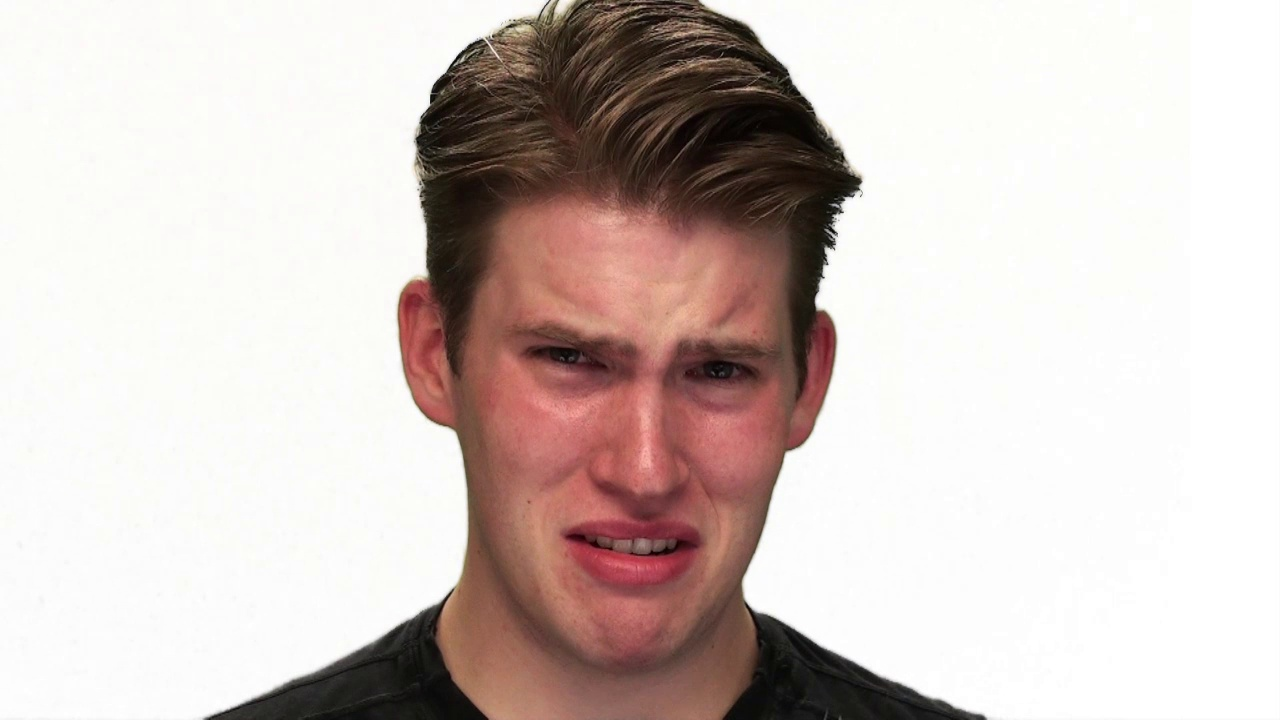

In [ ]:
roses = list(train_data_dir.glob('sad/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
from PIL import Image

im = Image.open(str(roses[0]))

print(im.size)
print(type(im.size))


w, h = im.size
print('width: ', w)
print('height:', h)


(1280, 720)
<class 'tuple'>
width:  1280
height: 720


## Dataset Preparation

In [ ]:
img_height,img_width=720,1280
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  # validation_split=0.2,
  # subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3590 files belonging to 8 classes.


I0000 00:00:1744633354.367723      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744633354.368545      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data_dir,
  # validation_split=0.2,
  # subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1190 files belonging to 8 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


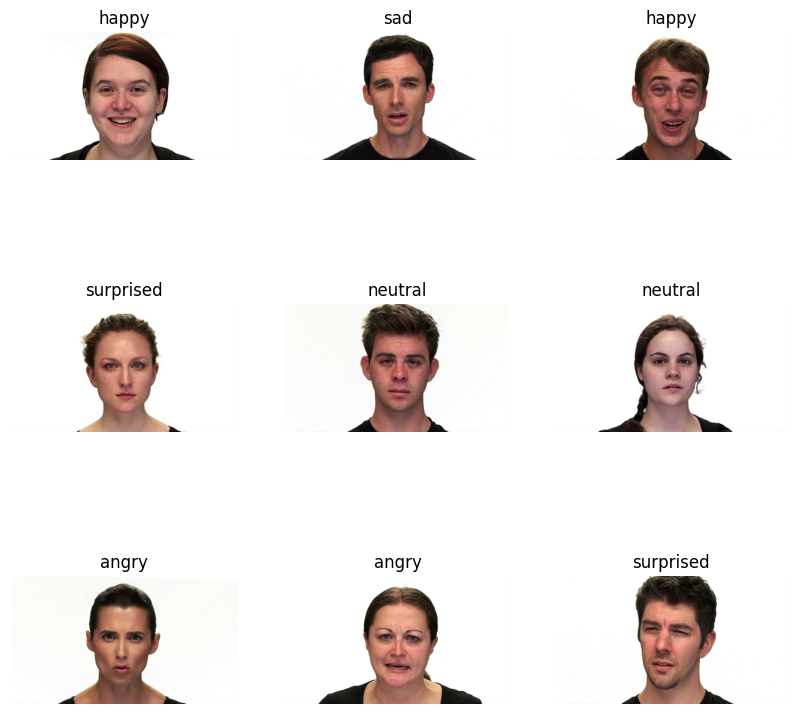

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for images, labels in train_ds.take(1):  # Get the first batch
    print(labels.shape)  # This will show the shape of the labels
    print(labels[:5])  # Inspect the first few labels


(32,)
tf.Tensor([7 0 6 3 0], shape=(5,), dtype=int32)


In [ ]:
from tensorflow.keras.utils import to_categorical

def one_hot_encode(batch_images, batch_labels):
    # Normalize images (scale pixel values to [0, 1])
    # batch_images = batch_images / 255.0

    # Convert integer labels to one-hot encoding
    batch_labels_one_hot = to_categorical(batch_labels, num_classes=8)  # Adjust num_classes if needed
    return batch_images, batch_labels_one_hot

# Apply the one-hot encoding transformation to both train and validation datasets
train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)

## Model Building

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(720, 1280, 3),  #cutome image input shape for HD images
                   pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(8, activation='softmax')) ## output probabilities for each 8 classes

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,640,904 (94.00 MB)

 Trainable params: 1,053,192 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','f1_score'])

## Train and Evaluate

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback to save the best model based on validation accuracy
checkpoint_callback = ModelCheckpoint(
    'best_model.keras',  # Path where the best model will be saved
    monitor='val_accuracy',  # Metric to monitor (can also be 'val_loss' or others)
    save_best_only=True,  # Only save the model when the monitored metric improves
    mode='max',  # Mode 'max' means we want to maximize the metric (e.g., accuracy)
    verbose=1  # Print information when saving the model
)
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback to stop training if validation accuracy doesn't improve
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,  # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights when stopping
)

# Train with both ModelCheckpoint and EarlyStopping
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[checkpoint_callback, early_stopping_callback] # Include the checkpoint callback
)

I0000 00:00:1744633433.630452     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1826 - f1_score: 0.1517 - loss: 2.1905
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to best_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.1830 - f1_score: 0.1522 - loss: 2.1892 - val_accuracy: 0.2000 - val_f1_score: 0.1398 - val_loss: 1.9240
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3291 - f1_score: 0.2841 - loss: 1.8173
Epoch 2: val_accuracy improved from 0.20000 to 0.32185, saving model to best_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.3293 - f1_score: 0.2844 - loss: 1.8168 - val_accuracy: 0.3218 - val_f1_score: 0.2326 - val_loss: 1.7971
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4002 - f1_score: 0.3454 - loss: 1.6186
Epoch 3: val_accuracy improved from 0.32185 to 0.32857, saving model to best_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.4004 - f1_score: 0.3457 - loss: 1.6182 - val_accuracy: 0.32

In [ ]:
# Save the model in TensorFlow SavedModel format
resnet_model.save('saved_model/resnet_model')

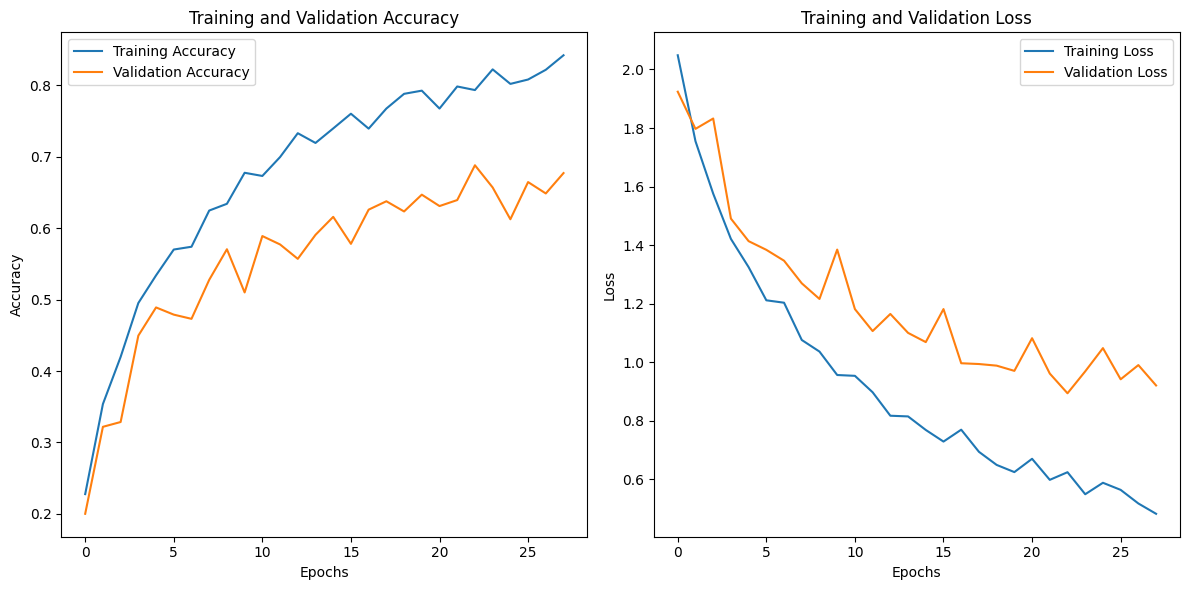

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

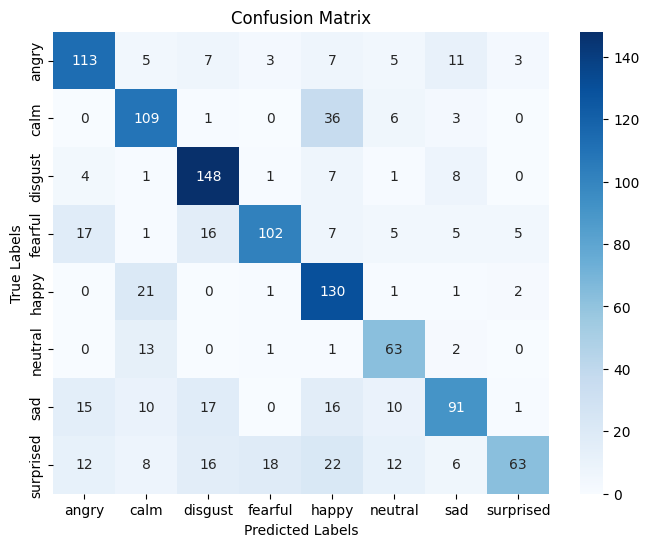

Classification Report:
              precision    recall  f1-score   support

       angry       0.70      0.73      0.72       154
        calm       0.65      0.70      0.67       155
     disgust       0.72      0.87      0.79       170
     fearful       0.81      0.65      0.72       158
       happy       0.58      0.83      0.68       156
     neutral       0.61      0.79      0.69        80
         sad       0.72      0.57      0.63       160
   surprised       0.85      0.40      0.55       157

    accuracy                           0.69      1190
   macro avg       0.70      0.69      0.68      1190
weighted avg       0.71      0.69      0.68      1190



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred_classes = []

# Iterate through the dataset and gather true labels and predictions
for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=-1))  # Convert one-hot encoded labels to integers
    y_pred = resnet_model.predict(images)  # Predict on the batch
    y_pred_classes.extend(np.argmax(y_pred, axis=-1))  # Get the predicted class labels

# Convert lists to numpy arrays for further processing
y_true = np.array(y_true)
y_pred_classes = np.array(y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


In [ ]:
from tensorflow import keras

# Load the model
model = keras.models.load_model('/kaggle/input/video-frame-emotion-classifier-revdees/keras/default/1/transfer_learning_for_revdees_frames.keras')

# Check the model architecture
model.summary()


In [ ]:

img_height,img_width=720,1280
batch_size = 32
test_data_dir = pathlib.Path('/kaggle/working/frames/test')
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred_classes = []

# Iterate through the dataset and gather true labels and predictions
for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=-1))  # Convert one-hot encoded labels to integers
    y_pred = resnet_model.predict(images)  # Predict on the batch
    y_pred_classes.extend(np.argmax(y_pred, axis=-1))  # Get the predicted class labels

# Convert lists to numpy arrays for further processing
y_true = np.array(y_true)
y_pred_classes = np.array(y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


## Plot the Results

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

def one_hot_encode(batch_images, batch_labels):
    # Normalize images (scale pixel values to [0, 1])
    # batch_images = batch_images / 255.0

    # Convert integer labels to one-hot encoding
    batch_labels_one_hot = to_categorical(batch_labels, num_classes=8)  # Adjust num_classes if needed
    return batch_images, batch_labels_one_hot

#convert labels one hot encoded from integers
test_ds = test_ds.map(one_hot_encode)

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred_classes = []
index = 0
# Iterate through the dataset and gather true labels and predictions
for images, labels in test_ds:
    print(index)
    index+=1
    y_true.extend(np.argmax(labels.numpy(), axis=-1))  # Convert one-hot encoded labels to integers
    y_pred = model.predict(images)  # Predict on the batch
    y_pred_classes.extend(np.argmax(y_pred, axis=-1))  # Get the predicted class labels

In [ ]:
# Convert lists to numpy arrays for further processing
y_true = np.array(y_true)
y_pred_classes = np.array(y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

## Save the model

# Audio Modality

## EDA for Audio Recognition

In [ ]:
# import matplotlib.pyplot as plt
# y, _ = librosa.load(file_paths[1], sr=16000)
# mfcc = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=40)
# plt.imshow(mfcc, cmap='viridis', origin='lower', aspect='auto')
# plt.colorbar(format="%+2.0f dB")
# plt.show()


In [ ]:
import os
import random
import numpy as np
import librosa
import librosa.display
import torch
import torch.nn.functional as F
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

## Dataset preparation

In [ ]:

# Let's assume you have a list of file paths and their corresponding labels
emotion_labels = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]


# For demonstration purposes, let's visualize features for one sample audio per emotion
import math

def plot_audio_features(file_paths, labels, sr=16000, duration=3):
    num_samples = len(file_paths)
    ncols = 2
    nrows = math.ceil(num_samples / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows))
    axes = axes.flatten()  # Flatten to 1D for easy indexing

    for i, (file_path, label) in enumerate(zip(file_paths, labels)):
        y, _ = librosa.load(file_path, sr=sr)

        # Pad or trim the audio
        if len(y) < sr * duration:
            y = np.pad(y, (0, sr * duration - len(y)))
        else:
            y = y[:sr * duration]

        # Extract features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        delta = librosa.feature.delta(mfcc)
        delta2 = librosa.feature.delta(mfcc, order=2)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        rmse = librosa.feature.rms(y=y)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

        features = {
            'MFCC': mfcc,
            'Delta': delta,
            'Delta2': delta2,
            'Chroma': chroma,
            'Contrast': contrast,
            'ZCR': zcr,
            'RMSE': rmse,
            'Centroid': centroid
        }

        ax = axes[i]
        ax.set_title(f"Emotion: {label}")
        for feature_name, feature in features.items():
            ax.plot(feature.mean(axis=1), label=feature_name)

        ax.legend(loc="upper right")

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



In [ ]:
def extract_audio_features(y, sr=16000, duration=3):
    max_len = sr * duration
    # Fix length: truncate or pad the audio to match the target length
    if len(y) < max_len:
        y = np.pad(y, (0, max_len - len(y)))
    else:
        y = y[:max_len]

    # ✅ Normalize waveform to avoid underflow
    if np.max(np.abs(y)) > 0:
        y = y / np.max(np.abs(y))

    # Extract features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)

    # chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    # rmse = librosa.feature.rms(y=y)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    # Normalize each feature
    def norm(x): return librosa.util.normalize(x, axis=1)

    feature_stack = np.vstack([
        norm(mfcc),
        norm(delta),
        norm(delta2),
        # norm(chroma),
        norm(contrast),
        norm(zcr),
        # norm(rmse),
        norm(centroid)
    ])  # Shape: (features, frames)

    return feature_stack.T  # Shape: (frames, features)

class RevDeEsDataset(Dataset):
    def __init__(self, file_paths, labels=None, sr=16000, duration=3):
        self.file_paths = file_paths
        self.labels = labels
        self.sr = sr
        self.duration = duration
        self.max_len = sr * duration

    def __getitem__(self, idx):
        path = self.file_paths[idx]
        y, _ = librosa.load(path, sr=self.sr)
        # Fix the length of the audio
        if len(y) < self.max_len:
            y = np.pad(y, (0, self.max_len - len(y)))  # Pad with zeros if shorter
        else:
            y = y[:self.max_len]  # Truncate if longer

        features = extract_audio_features(y, sr=self.sr)  # Extract audio features (e.g., MFCC, delta, etc.)
        features = torch.tensor(features, dtype=torch.float32)

        if self.labels is not None:
            label = self.labels[idx]
            return features, label
        else:
            return features, path

    def __len__(self):
        return len(self.file_paths)


In [ ]:
import os
from glob import glob

def get_audio_filepaths_and_labels(root_dir, exts=[".wav", ".mp3"]):
    file_paths = []
    labels = []
    class_to_idx = {}

    for idx, class_name in enumerate(sorted(os.listdir(root_dir))):
        class_path = os.path.join(root_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        class_to_idx[class_name] = idx
        for ext in exts:
            files = glob(os.path.join(class_path, f"*{ext}"))
            file_paths.extend(files)
            labels.extend([idx] * len(files))

    return file_paths, labels, class_to_idx

train_dir = "/kaggle/working/audio/train"  # <- This contains subfolders like angry/, happy/, etc.
valid_dir = "/kaggle/working/audio/valid"  # <- This contains subfolders like angry/, happy/, etc.

train_paths, train_labels, label_map = get_audio_filepaths_and_labels(train_dir)
val_file_paths, val_labels, label_map = get_audio_filepaths_and_labels(valid_dir)

print(f"Total files: {len(train_paths)}")
print(f"Label Mapping: {label_map}")


Total files: 1231
Label Mapping: {'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}


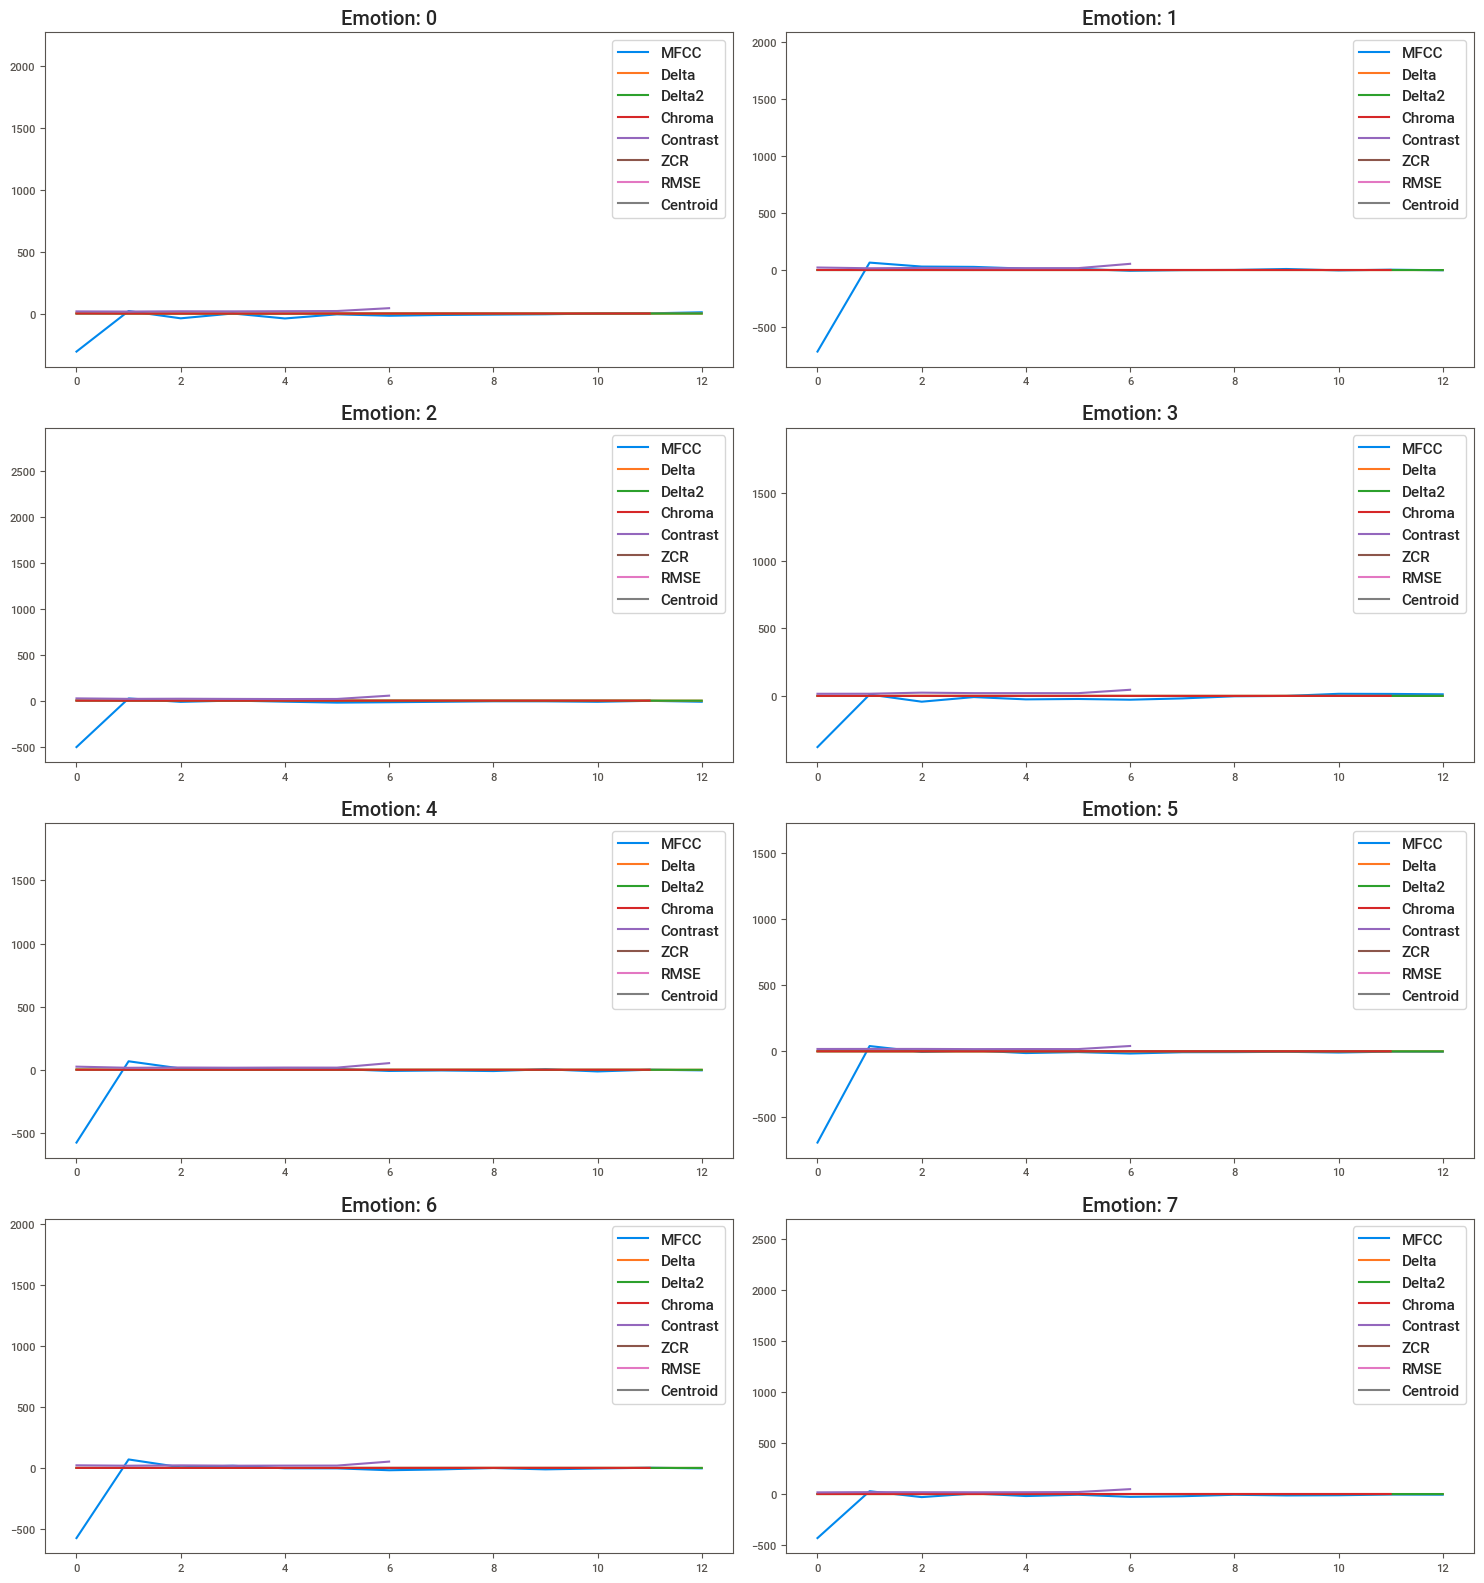

In [ ]:
# Call the function with sample file paths and their corresponding labels
# Example (replace with actual file paths and labels from your dataset)
import pandas as pd

temp = pd.DataFrame()
temp["p"] = val_file_paths
temp["l"] = val_labels

grouped = temp.groupby("l").first()
grouped.reset_index(inplace=True)
file_paths = grouped["p"].to_list()
labels = grouped["l"].to_list()

plot_audio_features(file_paths, labels)

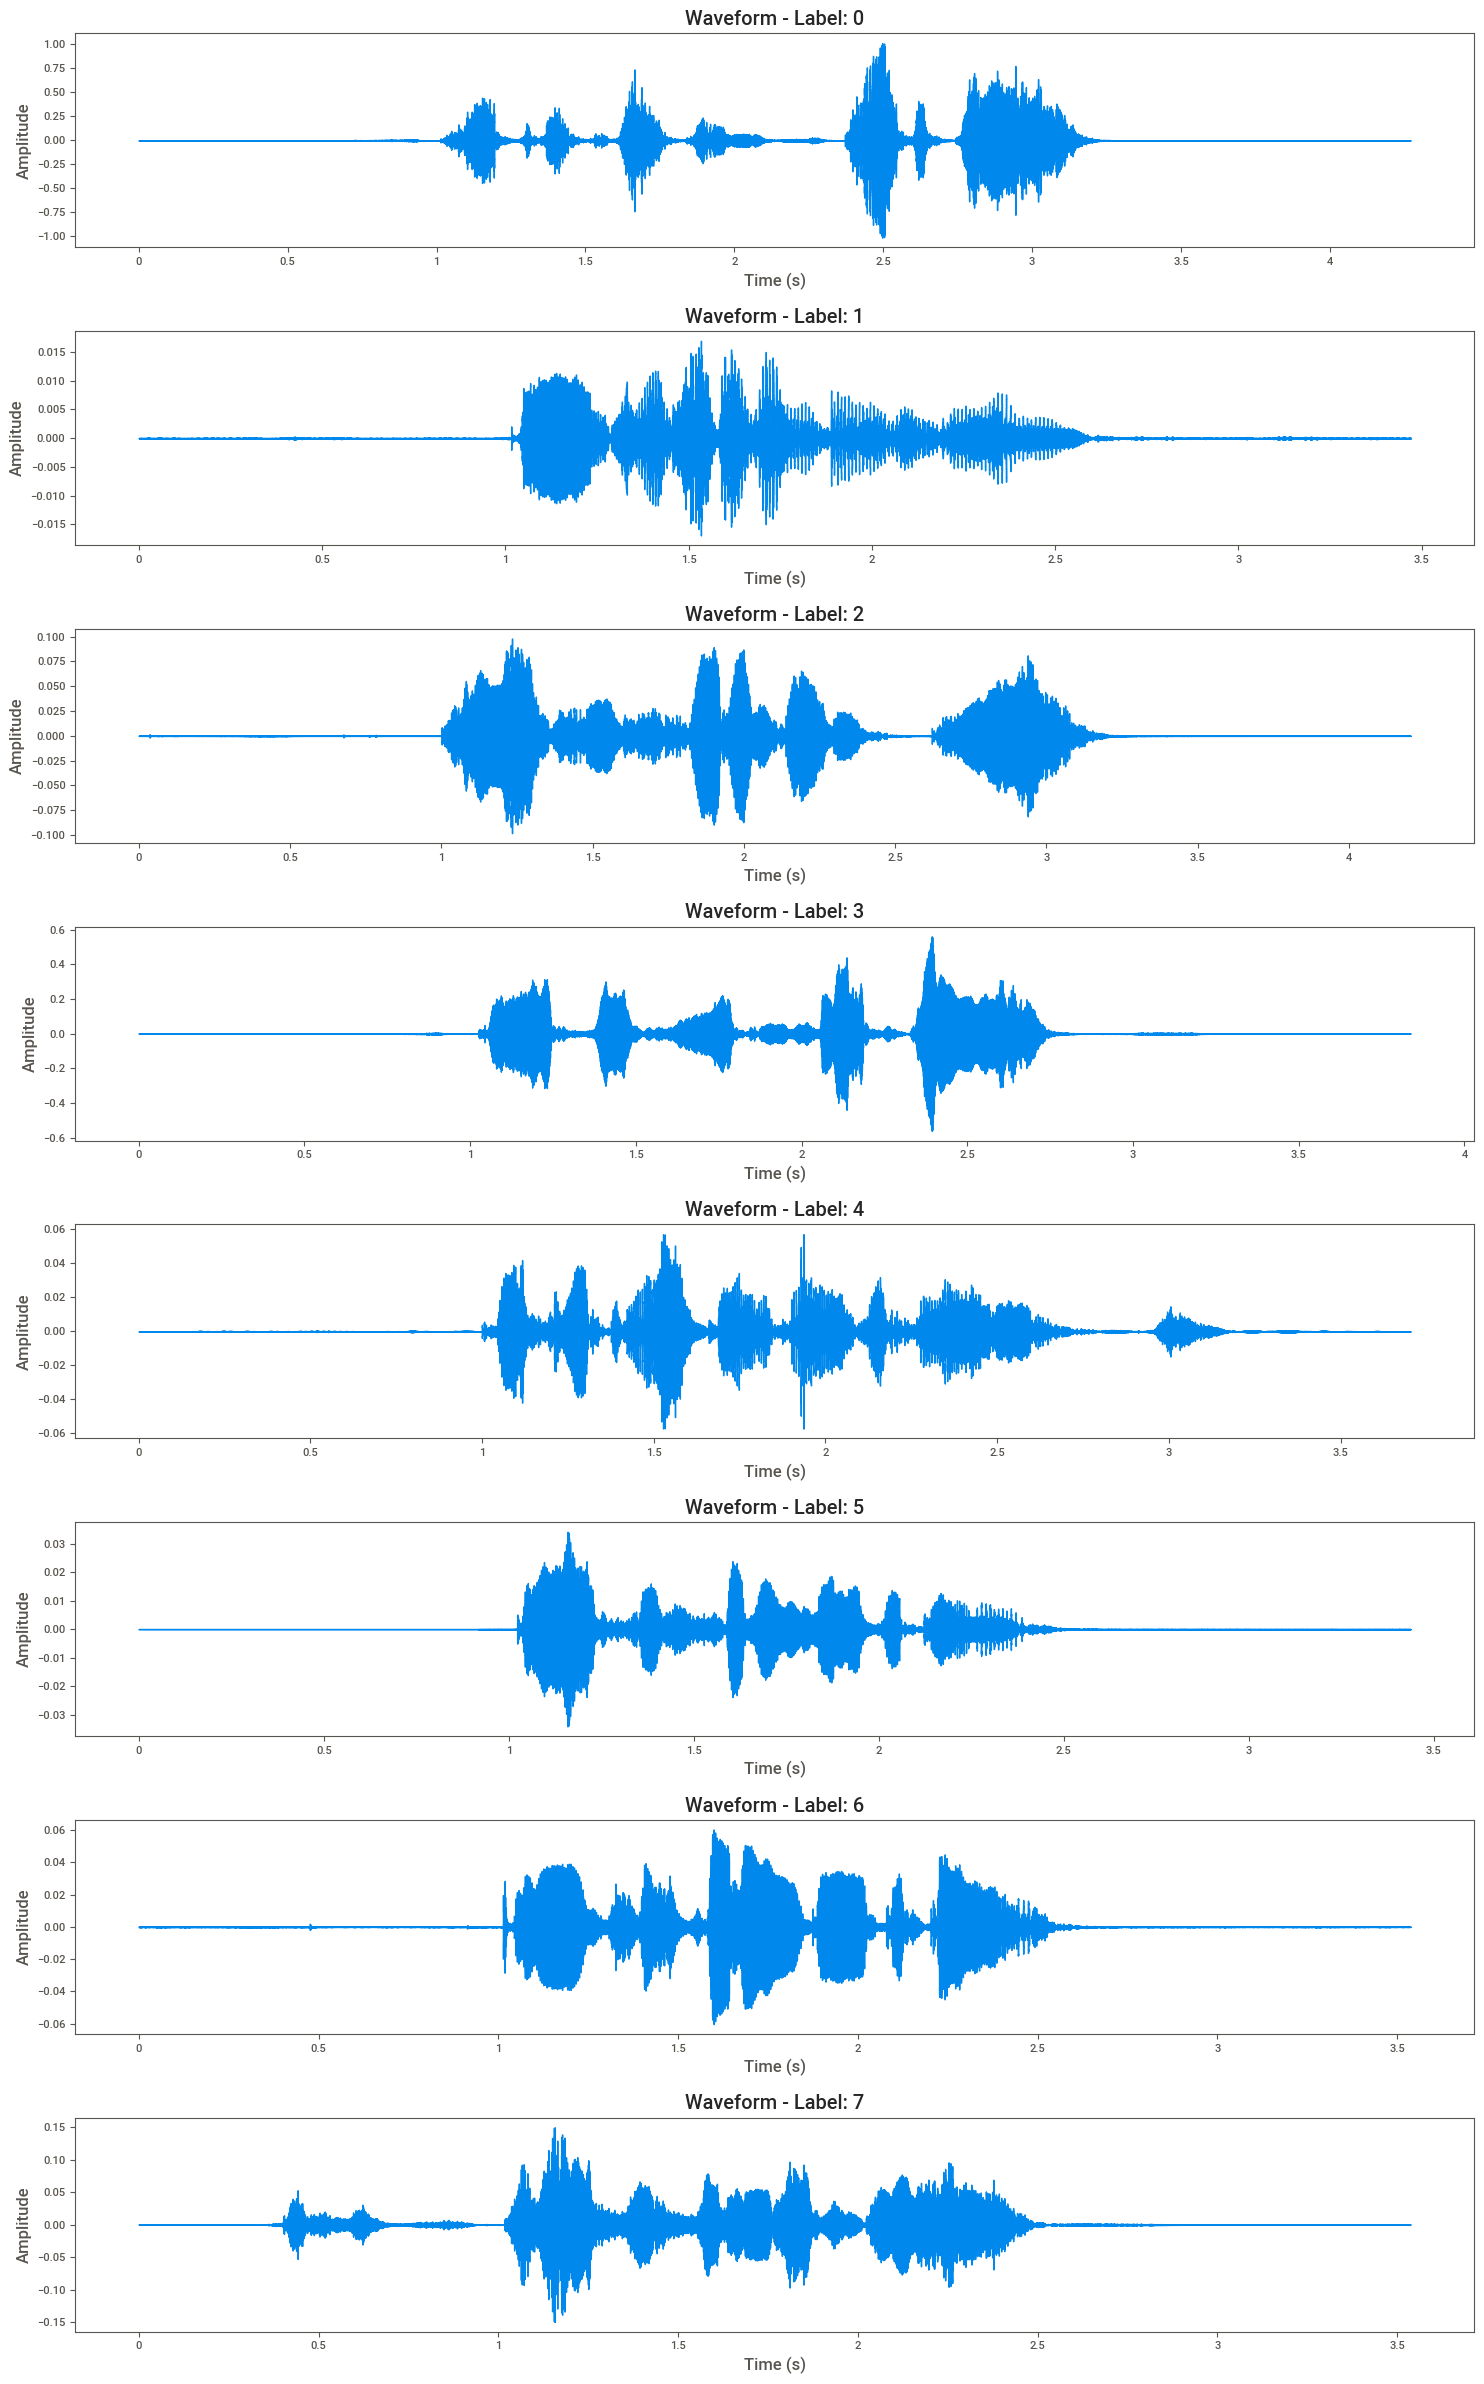

In [ ]:
def plot_waveforms(paths, labels, sr=16000):
    num_files = len(paths)
    plt.figure(figsize=(15, 3 * num_files))

    for i, (path, label) in enumerate(zip(paths, labels)):
        y, _ = librosa.load(path, sr=sr)
        plt.subplot(num_files, 1, i + 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform - Label: {label}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.tight_layout()

    plt.show()

plot_waveforms(grouped["p"].to_list(), grouped["l"].to_list())

In [ ]:
train_set = RevDeEsDataset(train_paths, train_labels)
val_set = RevDeEsDataset(val_file_paths, val_labels)

In [ ]:
len(train_set), len(val_set)

(1231, 137)

In [ ]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
# Get feature dimensions for model input
sample_x, _ = train_set[0]
features_time_steps, features_dim = sample_x.shape
sample_x.shape

torch.Size([94, 129])

In [ ]:
NUM_CLASSES = len(set(train_labels))
NUM_CLASSES, len(train_loader), len(val_loader)

(8, 39, 5)

## Model building

In [ ]:
##########################
#Use Attention After RNN : Add attention after the LSTM output to weigh different time steps.
#########################
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: [batch, seq_len, hidden_dim]
        weights = torch.softmax(self.attn(x), dim=1)
        context = (x * weights).sum(dim=1)
        return context


# ===========================
# CRNN Model
# ===========================
class CRNN(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(CRNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.3),
            nn.MaxPool2d((2, 2)),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
        )
        cnn_out_time = input_shape[0] // 8 #CNN has 3 maxpool layers, each halving both the time and frequency axes, so both T and F are divided by 8
        cnn_out_freq = input_shape[1] // 8
        # self.rnn = nn.LSTM(input_size=cnn_out_freq * 64, hidden_size=128, batch_first=True, bidirectional=True)
        # self.fc = nn.Linear(128 * 2, num_classes)
        self.rnn = nn.LSTM(input_size=cnn_out_freq * 128, hidden_size=256,
                   batch_first=True, bidirectional=True, num_layers=2, dropout=0.3)

        self.attention = Attention(512)
        self.fc = nn.Linear(512, num_classes)
    def forward(self, x):
        x = self.cnn(x)
        b, c, t, f = x.shape
        x = x.permute(0, 2, 1, 3).contiguous().view(b, t, c * f)
        x, _ = self.rnn(x)
        # x = self.fc(x[:, -1])
        x = self.attention(x)
        x = self.fc(x)
        return x


In [ ]:
# Check for GPU (CUDA) availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CRNN(input_shape=(features_time_steps, features_dim), num_classes=NUM_CLASSES).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

## Train and Validate

In [ ]:
# ===========================
# Train / Validate
# ===========================
def train(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        x = x.unsqueeze(1)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate(model, dataloader, criterion, device, num_classes):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            x = x.unsqueeze(1)  # Adjust this as per model
            out = model(x)
            loss = criterion(out, y)
            total_loss += loss.item()

            probs = F.softmax(out, dim=1)  # Get predicted probabilities
            preds = torch.argmax(probs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return total_loss / len(dataloader), acc, f1, all_preds, all_labels, all_probs

In [ ]:
train_losses, val_losses, val_accuracies, val_f1s = [], [], [], []

In [ ]:
for epoch in range(50):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc, val_f1, val_preds, val_labels, val_probs = validate(model, val_loader, criterion, device, num_classes=NUM_CLASSES)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1s.append(val_f1)
    print(f"Epoch {epoch+1}: TL {train_loss:.4f}, VL {val_loss:.4f}, Acc {val_acc:.4f}, F1 {val_f1:.4f}")

Epoch 1: TL 2.0515, VL 1.9488, Acc 0.2336, F1 0.1920
Epoch 2: TL 1.9242, VL 1.8354, Acc 0.3066, F1 0.2476
Epoch 3: TL 1.8125, VL 1.6555, Acc 0.3431, F1 0.2966
Epoch 4: TL 1.7411, VL 1.5724, Acc 0.3358, F1 0.2474
Epoch 5: TL 1.7188, VL 1.5009, Acc 0.3504, F1 0.2923
Epoch 6: TL 1.6769, VL 1.6017, Acc 0.3723, F1 0.3299
Epoch 7: TL 1.6186, VL 1.3830, Acc 0.3869, F1 0.3207
Epoch 8: TL 1.5615, VL 1.3680, Acc 0.4453, F1 0.4203
Epoch 9: TL 1.5669, VL 1.5399, Acc 0.4015, F1 0.3971
Epoch 10: TL 1.4672, VL 1.3442, Acc 0.4526, F1 0.4285
Epoch 11: TL 1.4169, VL 1.4905, Acc 0.3723, F1 0.3413
Epoch 12: TL 1.3596, VL 1.2862, Acc 0.4453, F1 0.4318
Epoch 13: TL 1.3208, VL 1.2038, Acc 0.4964, F1 0.4938
Epoch 14: TL 1.2441, VL 1.2758, Acc 0.4964, F1 0.4760


## Plot the Results

In [ ]:
# ===========================
# Plotting Function
# ===========================
def plot_curves(train_losses, val_losses, val_accuracies, val_f1s):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, label='Val Accuracy')
    plt.plot(epochs, val_f1s, label='Val F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Validation Accuracy and F1')
    plt.legend()
    plt.tight_layout()
    plt.show()

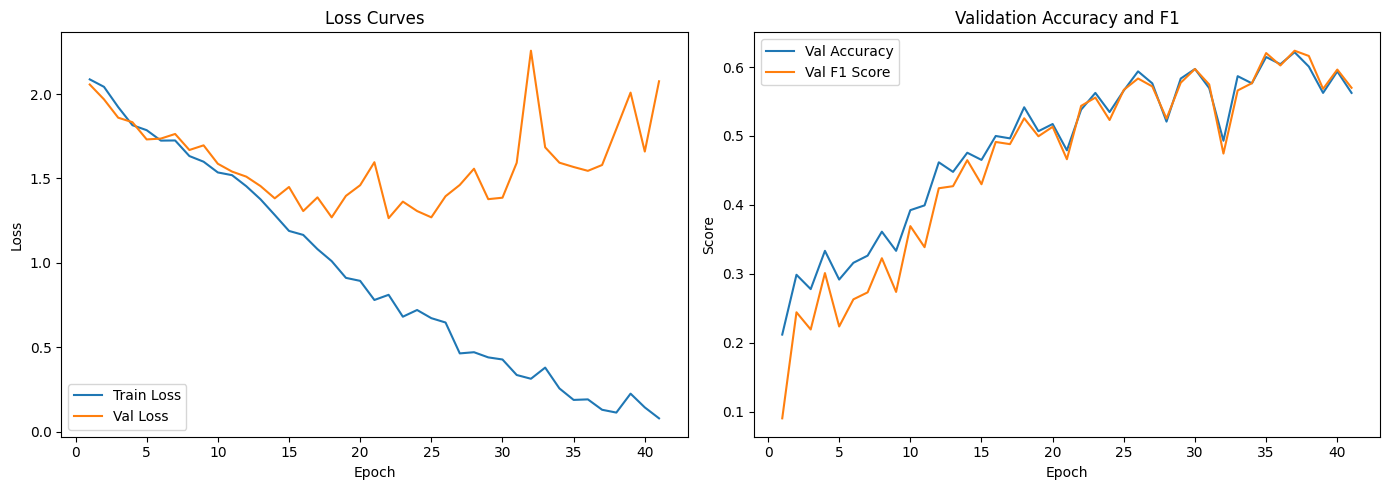

In [ ]:
plot_curves(train_losses, val_losses, val_accuracies, val_f1s)

In [ ]:
files = []
import os
import pandas as pd
for dirname, _, filenames in os.walk("/kaggle/input/organised-audio-data-revdees/kaggle/working/organized_data_audio/test"):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
len(files)

test_df = pd.DataFrame()
test_df["paths"] = files

In [ ]:
test_df["paths"][0]

In [ ]:
test_df["label"] = test_df["paths"].apply(lambda x: x.split("/")[-2])

In [ ]:
test_df['label'].unique()

In [ ]:
import pandas as pd

# Emotion to integer mapping
emotion_to_int = emotion_to_int = {
    'neutral': 0,
    'calm': 1,
    'happy': 2,
    'sad': 3,
    'angry': 4,
    'fearful': 5,
    'disgust': 6,
    'surprised': 7
}


# Map labels to integers
test_df['emotion_int'] = test_df['label'].map(emotion_to_int)


In [ ]:
test_file_paths = test_df["paths"].to_list()
test_labels = test_df["emotion_int"].to_list()

test_set = RevDeEsDataset(test_file_paths, test_labels, augment=False)
test_loader = DataLoader(test_set, batch_size=32)

In [ ]:
sample_x, _ = test_set[0]
features_time_steps, features_dim = sample_x.shape

In [ ]:
NUM_CLASSES = len(set(test_labels))
NUM_CLASSES

In [ ]:
# Check for GPU (CUDA) availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CRNN(input_shape=(features_time_steps, features_dim), num_classes=NUM_CLASSES).to(device)

# Load the checkpoint
checkpoint = torch.load('/kaggle/input/audio-classifier-for-revdees/pytorch/default/1/crnn_attention_final_model.pth',
                        map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Extract the model state_dict from the checkpoint
model_state_dict = checkpoint['model_state_dict']

# Now load the model state_dict into the model
model.load_state_dict(model_state_dict)



In [ ]:
criterion = nn.CrossEntropyLoss()

# val_loss, val_acc, val_f1 = validate(model, test_loader, criterion, device)
val_loss, val_acc, val_f1, val_preds, val_labels, val_probs = validate(model, test_loader, criterion, device, num_classes=NUM_CLASSES)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Optional: emotion map for readability
emotion_map = emotion_to_int = {
    'neutral': 1,
    'calm': 2,
    'happy': 3,
    'sad': 4,
    'angry': 5,
    'fearful': 6,
    'disgust': 7,
    'surprised': 8
}

labels = list(emotion_map.keys())

# Compute confusion matrix
cm = confusion_matrix(val_labels, val_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(val_labels, val_preds, target_names=labels))


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Binarize the true labels for ROC (One-vs-Rest)
val_labels_bin = label_binarize(val_labels, classes=np.arange(8))  # num_classes = 8
val_probs = np.array(val_probs)

# ROC-AUC score
roc_auc = roc_auc_score(val_labels_bin, val_probs, average='macro', multi_class='ovr')
print(f"Macro ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curves
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(8):  # Loop over each class
    fpr[i], tpr[i], _ = roc_curve(val_labels_bin[:, i], val_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(val_labels_bin.ravel(), val_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, 8))
for i in range(8):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f"Class {i+1} (AUC = {roc_auc[i]:.2f})")
plt.plot(fpr["micro"], tpr["micro"], color='black', linestyle='--', label=f"Micro-Average (AUC = {roc_auc['micro']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
from itertools import cycle

# Get number of classes
num_classes = len(np.unique(val_labels))

# Binarize labels for ROC computation
y_true_bin = label_binarize(val_labels, classes=list(range(num_classes)))
y_score = np.array(val_probs)

# ROC-AUC score (macro)
roc_auc_macro = roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr')
print(f"Macro ROC-AUC: {roc_auc_macro:.4f}")

# Plot ROC Curve per class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'limegreen', 'crimson', 'gold', 'magenta', 'teal'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

## Save/Load the model

In [ ]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': 49,  # or whatever your final epoch is
    'train_losses': train_losses,
    'val_losses': val_losses,
    'val_accuracies': val_accuracies,
    'val_f1s': val_f1s
}, 'crnn_attention_final_model.pth')

print("✅ Model saved successfully!")


# 224 Video model

In [ ]:
import pandas as pd
final_df = pd.read_csv("/kaggle/input/mapping-train-test-valid-revdess/mapping_train_test_valid.csv")
final_df

,Unnamed: 0,index,paths,Modality,channel,emotion,intensity,statement,repetition,actor,key,emotion_label,intensity_label,gender_label,audio_paths,statement_label,gender,strat_key,category
0,0,3432,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,6,1,1,1,15,01-06-01-01-01-15,fearful,normal,Male,/kaggle/input/ravdess-emotional-speech-audio/A...,Kids by door,1,06_01_01_01,train
1,1,3222,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,7,2,2,2,14,01-07-02-02-02-14,disgust,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/a...,Dogs by door,0,07_02_02_02,train
2,2,4636,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,6,1,2,1,20,01-06-01-02-01-20,fearful,normal,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,Dogs by door,0,06_01_02_01,train
3,3,1234,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,3,2,1,2,6,01-03-02-01-02-06,happy,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,Kids by door,0,03_02_01_02,train
4,4,1220,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,2,2,2,1,6,01-02-02-02-01-06,calm,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,Dogs by door,0,02_02_02_01,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,2726,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,6,2,2,2,12,01-06-02-02-02-12,fearful,strong,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,Dogs by door,0,06_02_02_02,valid
1436,1436,3212,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,7,1,2,1,14,01-07-01-02-01-14,disgust,normal,Female,/kaggle/input/ravdess-emotional-speech-audio/a...,Dogs by door,0,07_01_02_01,valid
1437,1437,3658,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,5,1,1,2,16,01-05-01-01-02-16,angry,normal,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,Kids by door,0,05_01_01_02,valid
1438,1438,332,/kaggle/input/ravdess-emotional-speech-video/R...,1,1,7,1,2,1,2,01-07-01-02-01-02,disgust,normal,Female,/kaggle/input/ravdess-emotional-speech-audio/A...,Dogs by door,0,07_01_02_01,valid


In [ ]:
final_df.columns

Index(['Unnamed: 0', 'index', 'paths', 'Modality', 'channel', 'emotion',
       'intensity', 'statement', 'repetition', 'actor', 'key', 'emotion_label',
       'intensity_label', 'gender_label', 'audio_paths', 'statement_label',
       'gender', 'strat_key', 'category'],
      dtype='object')

In [ ]:
extract_frames_and_audio_from_paths(final_df, 15)

NameError: name 'extract_frames_and_audio_from_paths' is not defined

In [ ]:
import os
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

2025-04-15 11:45:13.829336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744717514.145855      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744717514.235395      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# === SETUP ===
# Set directories for train, validation, and test data
train_data_dir = '/kaggle/working/frames/train'
val_data_dir = '/kaggle/working/frames/valid'
test_data_dir = '/kaggle/working/frames/test'

train_data_dir = pathlib.Path(train_data_dir)
val_data_dir = pathlib.Path(val_data_dir)

# Parameters
img_height, img_width = 224, 224
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# === LOAD DATA ===
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(f"Class Names: {class_names}")



Found 9673 files belonging to 8 classes.


I0000 00:00:1744717532.772069      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744717532.772798      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 1075 files belonging to 8 classes.
Class Names: ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [ ]:
# === PREPROCESSING ===
# Normalize and one-hot encode
def one_hot_encode(batch_images, batch_labels):
    # batch_images = tf.cast(batch_images, tf.float32) / 255.0
    batch_labels_one_hot = tf.one_hot(batch_labels, depth=len(class_names))
    return batch_images, batch_labels_one_hot

# Apply to datasets with optimizations
train_ds = train_ds.map(one_hot_encode).shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(one_hot_encode).cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# === DATA AUGMENTATION ===
data_augmentation = tf.keras.Sequential([
    # layers.Rescaling(1./255),  # Normalize
    layers.RandomFlip("horizontal"),
    # layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# === MODEL ===

# Pretrained ResNet50 without top layer
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    weights='imagenet'
)
# Unfreeze last few layers as dataset is very different (like facial expressions, emotions, etc.), fine-tuning helps a lot.
for layer in pretrained_model.layers[-20:]:
    layer.trainable = True

# Add layers
resnet_model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    pretrained_model,
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile
optimizer = Adam(learning_rate=1e-4)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','f1_score'])


# === CALLBACKS ===
checkpoint_callback = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# === TRAINING ===
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[checkpoint_callback, early_stopping_callback]
)


Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.4779 - f1_score: 0.4604 - loss: 1.4518
Epoch 1: val_accuracy improved from -inf to 0.56465, saving model to best_model.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 242s 556ms/step - accuracy: 0.4783 - f1_score: 0.4609 - loss: 1.4507 - val_accuracy: 0.5647 - val_f1_score: 0.5086 - val_loss: 1.5855
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.7736 - f1_score: 0.7657 - loss: 0.6462
Epoch 2: val_accuracy improved from 0.56465 to 0.69860, saving model to best_model.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 166s 549ms/step - accuracy: 0.7737 - f1_score: 0.7658 - loss: 0.6460 - val_accuracy: 0.6986 - val_f1_score: 0.6649 - val_loss: 0.8777
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.8480 - f1_score: 0.8431 - loss: 0.4317
Epoch 3: val_accuracy did not improve from 0.69860
303/303 ━━━━━━━━━━━━━━━━━━━━ 164s 543ms/step - accuracy: 0.8480 - f1_score: 0.8432 - loss: 0.4316 - val_accuracy: 0.6251 - val_

KeyboardInterrupt: 

In [ ]:
history

NameError: name 'history' is not defined

In [ ]:
from keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    return K.mean(f1)


In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# F1 Score
plt.plot(history.history['f1_score'], label='Train F1')
plt.plot(history.history['val_f1_score'], label='Val F1')
plt.legend()
plt.title('F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━

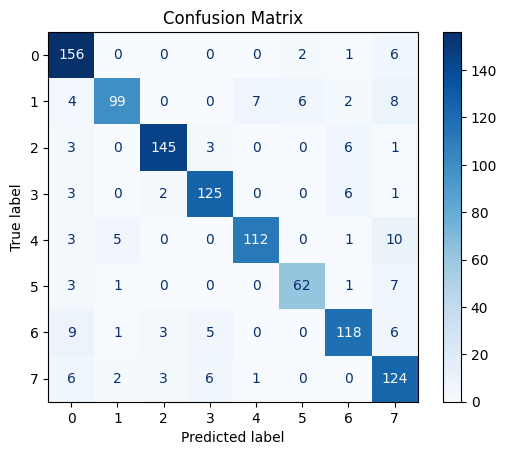

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
frame_model =  tf.keras.models.load_model("/kaggle/working/best_model.keras")
# Predict on validation data
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = frame_model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import shutil
from torchvision import datasets
y_true, y_pred = [], []
# Class names (Video index order)
video_class_names = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Class names (Audio index order)
audio_class_names = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


# --- Step 2: Predict from frames ---
# === PREPROCESSING ===
# === SETUP ===

test_data_dir = pathlib.Path("/kaggle/working/frames/valid")
# Parameters
img_height, img_width = 224, 224
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# === LOAD DATA ===
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


# Normalize and one-hot encode
def one_hot_encode(batch_images, batch_labels):
    # batch_images = tf.cast(batch_images, tf.float32) / 255.0
    batch_labels_one_hot = tf.one_hot(batch_labels, depth=8)
    return batch_images, batch_labels_one_hot

# Apply to datasets with optimizations
test_ds = test_ds.map(one_hot_encode).cache().prefetch(buffer_size=AUTOTUNE)

# Predict on validation data
frame_probs = []

for images, labels in test_ds:
    preds = frame_model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# avg_frame_probs = np.mean(frame_probs, axis=0)
# # avg_frame_probs = np.median(frame_probs, axis=0)
# video_probs_dict_raw = dict(zip(video_class_names, avg_frame_probs))
# video_probs_dict = {emo: video_probs_dict_raw.get(emo, 0.0) for emo in video_class_names}




Found 1075 files belonging to 8 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━

In [ ]:
test_data_dir = pathlib.Path("/kaggle/input/test-data")
img_height, img_width = 224, 224
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# Load data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Normalize and one-hot encode
def one_hot_encode(batch_images, batch_labels):
    # batch_images = tf.cast(batch_images, tf.float32) / 255.0
    batch_labels_one_hot = tf.one_hot(batch_labels, depth=8)
    return batch_images, batch_labels_one_hot

test_ds = test_ds.map(one_hot_encode).cache().prefetch(buffer_size=AUTOTUNE)

# Predict on validation data
y_true, y_pred = [], []
frame_probs = []

for images, labels in test_ds:
    preds = frame_model.predict(images)
    frame_probs.append(preds)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Aggregate frame predictions
frame_probs_concat = np.concatenate(frame_probs, axis=0)
avg_frame_probs = np.mean(frame_probs_concat, axis=0)

# Map predictions to class names
video_probs_dict_raw = dict(zip(video_class_names, avg_frame_probs))
video_probs_dict = {emo: video_probs_dict_raw.get(emo, 0.0) for emo in video_class_names}
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Found 565 files belonging to 8 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


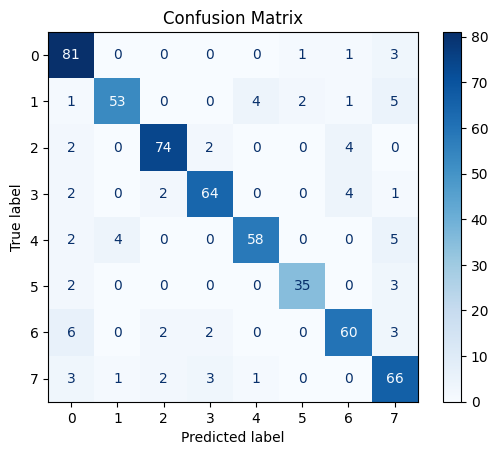

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

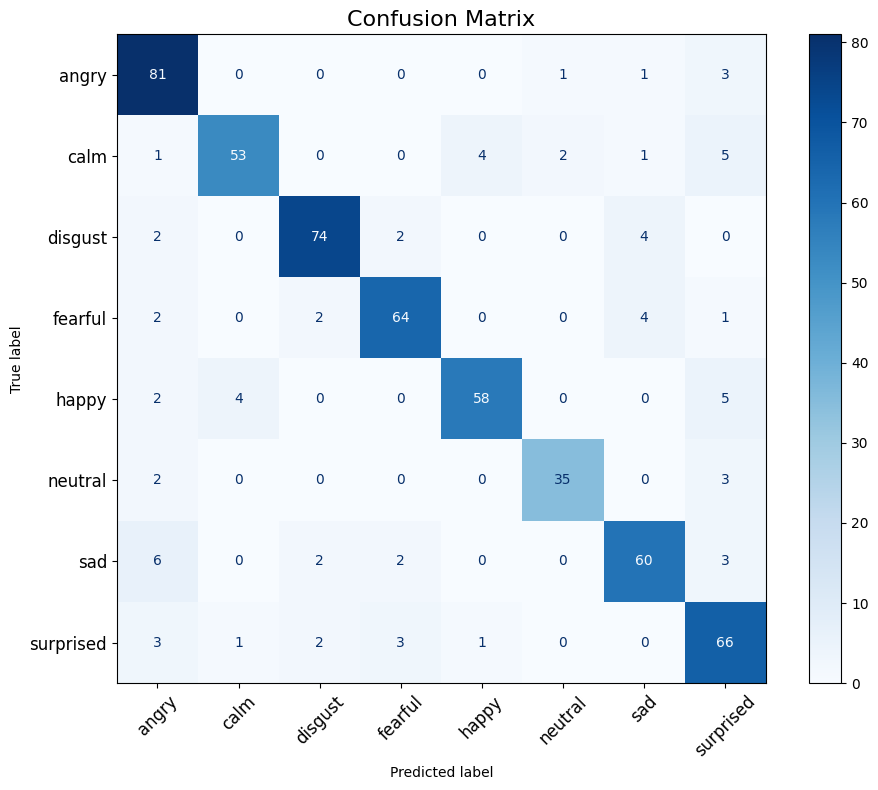

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# disp.plot(cmap=plt.cm.Blues)

fig, ax = plt.subplots(figsize=(10, 8))  # Increased figure size
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix", fontsize=16)
plt.grid(False)
plt.xticks(fontsize=12) # Increased xticks font size
plt.yticks(fontsize=12) # Increased yticks font size
plt.tight_layout()
plt.show()


In [ ]:
from rich.console import Console
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
console = Console()
console.print(classification_report(y_true, y_pred))

precision    recall  f1-score   support

           0       0.83      0.95      0.89       165
           1       0.92      0.79      0.85       126
           2       0.95      0.92      0.93       158
           3       0.90      0.91      0.91       137
           4       0.93      0.85      0.89       131
           5       0.89      0.84      0.86        74
           6       0.87      0.83      0.85       142
           7       0.76      0.87      0.81       142

    accuracy                           0.88      1075
   macro avg       0.88      0.87      0.87      1075
weighted avg       0.88      0.88      0.88      1075

In [ ]:
# === PREDICT ON TEST IMAGES ===
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    # img_array = img_array / 255.0  # Normalize
    return img_array

# Predict all images in the test folder
print("\n=== Predictions on Test Images ===")
for file_name in os.listdir(test_data_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(test_data_dir, file_name)
        img_array = load_and_preprocess_image(img_path)
        prediction = resnet_model.predict(img_array, verbose=0)
        predicted_class = class_names[np.argmax(prediction)]
        print(f"{file_name} => Predicted Emotion: {predicted_class}")


=== Predictions on Test Images ===


In [ ]:
y_pred

# Spectrogram Model

## 1. Save spectrogram as images

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, classification_report
import copy
from torchvision import datasets
import torch.nn.functional as F


In [ ]:
convert_dataset_to_spectrograms("/kaggle/input/frames-audio-train-test-validate-revdess-dataset/audio/train", "spectrogramss_train")

In [ ]:
convert_dataset_to_spectrograms("/kaggle/input/frames-audio-train-test-validate-revdess-dataset/audio/valid", "spectrogramss_valid")

In [ ]:
convert_dataset_to_spectrograms("/kaggle/input/frames-audio-train-test-validate-revdess-dataset/audio/test", "spectrogramss_test")

## 2. Load dataset using ImageFolder

In [ ]:
# === Data transforms ===
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.ToTensor(),
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [ ]:
train_dataset = datasets.ImageFolder('/kaggle/working/spectrograms/train', transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = datasets.ImageFolder('/kaggle/working/spectrograms/valid', transform=val_transforms)
val_loader = DataLoader(val_dataset, batch_size=32)

test_dataset = datasets.ImageFolder('/kaggle/working/spectrograms/test', transform=val_transforms)
test_loader = DataLoader(test_dataset, batch_size=32)

## 3. Use a pretrained ResNet18

In [ ]:


class SpectrogramCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(SpectrogramCNN, self).__init__()
        self.model = models.resnet18(pretrained=True)
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)


NameError: name 'nn' is not defined

In [ ]:

def save_spectrogram(audio_path, save_path, sr=22050, n_mels=128):
    y, _ = librosa.load(audio_path, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def convert_dataset_to_spectrograms(input_dir, output_dir):
    for emotion in os.listdir(input_dir):
        emotion_path = os.path.join(input_dir, emotion)
        out_emotion_path = os.path.join(output_dir, emotion)
        os.makedirs(out_emotion_path, exist_ok=True)

        for file in os.listdir(emotion_path):
            if file.endswith(".wav"):
                in_file = os.path.join(emotion_path, file)
                out_file = os.path.join(out_emotion_path, file.replace('.wav', '.png'))
                save_spectrogram(in_file, out_file)


# Function to convert dataset to spectrograms based on the DataFrame
def convert_dataframe_to_spectrograms(df, base_output_dir):
    # Iterate through the rows of the DataFrame
    for _, row in df.iterrows():
        # Extract relevant information from each row
        audio_path = row['audio_paths']  # Assuming this is the path to the .wav file
        category = row['category']      # Category for the directory
        emotion_label = row['emotion_label']  # Emotion label for sub-directory

        # Create the target directory structure: base_output_dir/category/emotion_label/
        output_dir = os.path.join(base_output_dir, category, str(emotion_label))
        os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

        # Define the output file name as a .png file
        file_name = os.path.basename(audio_path).replace('.wav', '.png')
        output_file_path = os.path.join(output_dir, file_name)

        # Save the spectrogram for the current audio file
        try:
            save_spectrogram(audio_path, output_file_path)
        except Exception as e:
            print(f"Error {e} occured in file {audio_path}")

try:
    shutil.rmtree('/kaggle/working/audio')
except:
    pass

base_output_dir = 'spectrograms'


convert_dataframe_to_spectrograms(final_df, base_output_dir)

## 4. Train the model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpectrogramCNN(num_classes=len(train_dataset.classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


for epoch in range(10):
    model.train()
    train_loss = 0
    train_preds = []
    train_labels = []

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    train_acc = accuracy_score(train_labels, train_preds)
    train_f1 = f1_score(train_labels, train_preds, average='weighted')

    # Validation
    model.eval()
    val_loss = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

    print(f"Epoch {epoch+1}: "
          f"Train Loss: {train_loss/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}, "
          f"Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")



Epoch 1: Train Loss: 1.7820, Train Acc: 0.3301, Train F1: 0.3068, Val Loss: 2.5299, Val Acc: 0.1168, Val F1: 0.0254
Epoch 2: Train Loss: 1.3493, Train Acc: 0.4959, Train F1: 0.4804, Val Loss: 1.1995, Val Acc: 0.5547, Val F1: 0.5405
Epoch 3: Train Loss: 1.1582, Train Acc: 0.5976, Train F1: 0.5878, Val Loss: 1.1154, Val Acc: 0.5766, Val F1: 0.5489
Epoch 4: Train Loss: 0.9684, Train Acc: 0.6496, Train F1: 0.6472, Val Loss: 0.9558, Val Acc: 0.6277, Val F1: 0.6156
Epoch 5: Train Loss: 0.8607, Train Acc: 0.6846, Train F1: 0.6825, Val Loss: 1.0394, Val Acc: 0.5985, Val F1: 0.5719
Epoch 6: Train Loss: 0.7975, Train Acc: 0.7065, Train F1: 0.7031, Val Loss: 1.0371, Val Acc: 0.6642, Val F1: 0.6601
Epoch 7: Train Loss: 0.6513, Train Acc: 0.7634, Train F1: 0.7621, Val Loss: 0.9881, Val Acc: 0.6861, Val F1: 0.6890
Epoch 8: Train Loss: 0.5882, Train Acc: 0.8041, Train F1: 0.8023, Val Loss: 0.9466, Val Acc: 0.6788, Val F1: 0.6813
Epoch 9: Train Loss: 0.5036, Train Acc: 0.8423, Train F1: 0.8410, Val Lo

##  Evaluate pretrained model on validation directory

In [ ]:


def evaluate_model(model, dataloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    report = classification_report(all_labels, all_preds, target_names=class_names)
    print("Classification Report:\n")
    print(report)


In [ ]:
# After training
evaluate_model(model, test_loader, class_names=val_dataset.classes)


Classification Report:

              precision    recall  f1-score   support

       angry       0.80      0.89      0.84         9
        calm       0.75      0.90      0.82        10
     disgust       0.78      0.70      0.74        10
     fearful       0.80      0.40      0.53        10
       happy       1.00      0.60      0.75        10
     neutral       0.50      0.50      0.50         4
         sad       0.40      0.60      0.48        10
   surprised       0.82      1.00      0.90         9

    accuracy                           0.71        72
   macro avg       0.73      0.70      0.70        72
weighted avg       0.75      0.71      0.71        72



In [ ]:




# === Pretrained ResNet18 fine-tuned ===
num_classes = 8  # adjust as needed
model = models.resnet18(pretrained=True)

# Freeze all layers initially
for param in model.parameters():
    param.requires_grad = False

# Replace classifier
model.fc = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(model.fc.in_features, num_classes)
)

# Unfreeze last conv block for fine-tuning
for param in model.layer4.parameters():
    param.requires_grad = True

model = model.to(device)

# === Optimizer, loss, scheduler ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)

# === Training loop with metrics ===
def evaluate(model, loader):
    model.eval()
    y_true, y_pred, val_loss = [], [], 0.0
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * imgs.size(0)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return val_loss / len(loader.dataset), acc, f1

# === Training ===
best_val_f1 = 0
patience = 5
patience_counter = 0
best_model = copy.deepcopy(model.state_dict())

for epoch in range(30):  # increase if needed
    model.train()
    train_loss, y_true, y_pred = 0.0, [], []

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

    train_loss /= len(train_loader.dataset)
    train_acc = accuracy_score(y_true, y_pred)
    train_f1 = f1_score(y_true, y_pred, average='weighted')

    val_loss, val_acc, val_f1 = evaluate(model, val_loader)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_model = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered!")
            break

# Load best model
model.load_state_dict(best_model)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth

  0%|          | 0.00/44.7M [00:00<?, ?B/s]
 38%|███▊      | 16.9M/44.7M [00:00<00:00, 176MB/s]
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


NameError: name 'device' is not defined

In [ ]:
!pip install torchcam
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
import numpy as np

# Load your model
model.load_state_dict(torch.load("best_cnn_model.pth"))
model.eval()
from torch.nn import Conv2d

# Automatically find last Conv2d layer
target_layer = None
for name, module in reversed(list(model.named_modules())):
    if isinstance(module, Conv2d):
        target_layer = name
        break

print(f"Using layer: {target_layer}")

# Choose target layer for Grad-CAM (e.g., last conv layer)
cam_extractor = GradCAM(model, target_layer=target_layer)

# Image preprocessing (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
# Load and preprocess image
image_path = "/kaggle/working/spectrogramss_test/angry/01-01-05-01-01-01-14_audio.png"
img = Image.open(image_path).convert("RGB")
input_tensor = transform(img).unsqueeze(0).to(device)

# Forward pass and CAM generation
out = model(input_tensor)
class_id = out.argmax().item()
activation_map = cam_extractor(class_id, out)

# Overlay CAM on original image
heatmap = activation_map[0].squeeze().cpu().numpy()
result = overlay_mask(img, Image.fromarray(np.uint8(heatmap * 255), mode='L'), alpha=0.5)

# Show
plt.figure(figsize=(8, 8))
plt.imshow(result)
plt.title(f"Grad-CAM for class {class_id}")
plt.axis("off")
plt.show()